<p><h3>1. Ler os dados</h3></p>
<span>Ler os dados  no arquivo csv, <b>Real_State_Properati</b></span>

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import folium
from folium.plugins import HeatMap

df = pd.read_csv("Real_State_Properati.csv", sep = '\t')
df


,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0
1,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,55.0
2,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,45.0
3,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,195000.0,USD,65.0
4,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0
...,...,...,...,...,...,...,...,...,...
17218,apartment,Barrio Norte,Argentina,Capital Federal,-34.599214,-58.402519,165000.0,USD,91.0
17219,apartment,Recoleta,Argentina,Capital Federal,-34.587425,-58.397372,165000.0,USD,44.0
17220,apartment,Belgrano,Argentina,Capital Federal,-34.563685,-58.442683,410000.0,USD,157.0
17221,apartment,Belgrano,Argentina,Capital Federal,-34.563685,-58.442683,410000.0,USD,157.0


<p><h3>2. Limpeza de dados</h3></p>
<span>Preparar os dados obtidos da leitura do arquivo csv</span>

<h4>2.1. Substituição de dados</h4>

In [74]:
dfdiffsurfacezerado = df['surface_total_in_m2'] != 0 
df2 = df[dfdiffsurfacezerado]
dfGroup = df2.groupby(['property_type', 'place_name']).mean('surface_total_in_m2')
dfmerge = pd.merge(df, dfGroup, on=['property_type', 'place_name'])
dfmerge = dfmerge.rename(columns={'surface_total_in_m2_y': 'surface_total_in_m2_media'})
dfmerge['surface_total_in_m2_Final'] = np.where(dfmerge['surface_total_in_m2_x']== 0, dfmerge['surface_total_in_m2_media'] , dfmerge['surface_total_in_m2_x'])
dfmerge

,property_type,place_name,country_name,state_name,lat_x,lon_x,price_x,currency,surface_total_in_m2_x,lat_y,lon_y,price_y,surface_total_in_m2_media,surface_total_in_m2_Final
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0,-34.653567,-58.501810,119049.180328,100.442623,55.0
1,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0,-34.653567,-58.501810,119049.180328,100.442623,140.0
2,PH,Mataderos,Argentina,Capital Federal,-34.657242,-58.502971,53000.0,USD,28.0,-34.653567,-58.501810,119049.180328,100.442623,28.0
3,PH,Mataderos,Argentina,Capital Federal,-34.650604,-58.496146,245000.0,USD,326.0,-34.653567,-58.501810,119049.180328,100.442623,326.0
4,PH,Mataderos,Argentina,Capital Federal,-34.656920,-58.489784,165000.0,USD,150.0,-34.653567,-58.501810,119049.180328,100.442623,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17218,PH,Palermo Viejo,Argentina,Capital Federal,-34.592963,-58.430450,330000.0,USD,143.0,-34.594894,-58.422291,254500.000000,131.500000,143.0
17219,PH,Parque Chas,Argentina,Capital Federal,-34.585679,-58.476317,270000.0,USD,150.0,-34.585679,-58.476317,270000.000000,150.000000,150.0
17220,PH,Palermo Chico,Argentina,Capital Federal,-34.580888,-58.410504,695000.0,USD,348.0,-34.580888,-58.410504,695000.000000,348.000000,348.0
17221,store,Agronomía,Argentina,Capital Federal,-34.588465,-58.485428,420000.0,USD,350.0,-34.588465,-58.485428,420000.000000,350.000000,350.0


In [75]:
dfmerge = dfmerge.drop(columns={'surface_total_in_m2_x','lat_y','lon_y','price_y'})
dfmerge = dfmerge.rename(columns={'lat_x': 'lat'})
dfmerge = dfmerge.rename(columns={'lon_x': 'lon'})
dfmerge = dfmerge.rename(columns={'price_x': 'price'})
dfmerge

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2_media,surface_total_in_m2_Final
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,100.442623,55.0
1,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,100.442623,140.0
2,PH,Mataderos,Argentina,Capital Federal,-34.657242,-58.502971,53000.0,USD,100.442623,28.0
3,PH,Mataderos,Argentina,Capital Federal,-34.650604,-58.496146,245000.0,USD,100.442623,326.0
4,PH,Mataderos,Argentina,Capital Federal,-34.656920,-58.489784,165000.0,USD,100.442623,150.0
...,...,...,...,...,...,...,...,...,...,...
17218,PH,Palermo Viejo,Argentina,Capital Federal,-34.592963,-58.430450,330000.0,USD,131.500000,143.0
17219,PH,Parque Chas,Argentina,Capital Federal,-34.585679,-58.476317,270000.0,USD,150.000000,150.0
17220,PH,Palermo Chico,Argentina,Capital Federal,-34.580888,-58.410504,695000.0,USD,348.000000,348.0
17221,store,Agronomía,Argentina,Capital Federal,-34.588465,-58.485428,420000.0,USD,350.000000,350.0


<h4>2.2. Conversão de dados</h4>

Adicionando uma coluna <b>price_usd</b> no dataframe, na qual valores que estão em peso argentino seram convertido para dolar americano

In [76]:
dfmerge['price_usd']= dfmerge.apply(lambda x: x.price * 0.0085 if x.currency!='USD' else x.price,axis=1)
dfmerge

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2_media,surface_total_in_m2_Final,price_usd
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,100.442623,55.0,62000.0
1,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,100.442623,140.0,239000.0
2,PH,Mataderos,Argentina,Capital Federal,-34.657242,-58.502971,53000.0,USD,100.442623,28.0,53000.0
3,PH,Mataderos,Argentina,Capital Federal,-34.650604,-58.496146,245000.0,USD,100.442623,326.0,245000.0
4,PH,Mataderos,Argentina,Capital Federal,-34.656920,-58.489784,165000.0,USD,100.442623,150.0,165000.0
...,...,...,...,...,...,...,...,...,...,...,...
17218,PH,Palermo Viejo,Argentina,Capital Federal,-34.592963,-58.430450,330000.0,USD,131.500000,143.0,330000.0
17219,PH,Parque Chas,Argentina,Capital Federal,-34.585679,-58.476317,270000.0,USD,150.000000,150.0,270000.0
17220,PH,Palermo Chico,Argentina,Capital Federal,-34.580888,-58.410504,695000.0,USD,348.000000,348.0,695000.0
17221,store,Agronomía,Argentina,Capital Federal,-34.588465,-58.485428,420000.0,USD,350.000000,350.0,420000.0


<h4>2.3. Criar informações baseadas nos dados</h4>

In [77]:
dfmerge['preco_metro'] = dfmerge['price_usd'] / dfmerge['surface_total_in_m2_Final']
dfmerge

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2_media,surface_total_in_m2_Final,price_usd,preco_metro
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,100.442623,55.0,62000.0,1127.272727
1,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,100.442623,140.0,239000.0,1707.142857
2,PH,Mataderos,Argentina,Capital Federal,-34.657242,-58.502971,53000.0,USD,100.442623,28.0,53000.0,1892.857143
3,PH,Mataderos,Argentina,Capital Federal,-34.650604,-58.496146,245000.0,USD,100.442623,326.0,245000.0,751.533742
4,PH,Mataderos,Argentina,Capital Federal,-34.656920,-58.489784,165000.0,USD,100.442623,150.0,165000.0,1100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
17218,PH,Palermo Viejo,Argentina,Capital Federal,-34.592963,-58.430450,330000.0,USD,131.500000,143.0,330000.0,2307.692308
17219,PH,Parque Chas,Argentina,Capital Federal,-34.585679,-58.476317,270000.0,USD,150.000000,150.0,270000.0,1800.000000
17220,PH,Palermo Chico,Argentina,Capital Federal,-34.580888,-58.410504,695000.0,USD,348.000000,348.0,695000.0,1997.126437
17221,store,Agronomía,Argentina,Capital Federal,-34.588465,-58.485428,420000.0,USD,350.000000,350.0,420000.0,1200.000000


In [78]:
############################## outlier MUITO ALTO
indexNames = dfmerge[ dfmerge['preco_metro'] > 206332 ].index
dfmerge.drop(indexNames , inplace=True)

<p><h3>3. Analisando os dados</h3></p>
<span>Demonstrar através de gráficos as informações obtidas dos dados do arquivo csv</span>

<h4>3.1. Preço do metro quadrado por bairro</h4>

In [79]:

medias_bairro = dfmerge.groupby(['place_name'])['preco_metro'].agg(['max','min','mean','median'])
medias_bairro

,max,min,mean,median
place_name,,,,
Abasto,2857.142857,914.893617,1998.555785,2009.132420
Agronomía,2638.297872,860.323887,2088.124134,2187.500000
Almagro,24387.804878,70.512821,2541.883604,2121.212121
Balvanera,13066.666667,467.796610,1964.499761,1850.925926
Barracas,29562.500000,318.750000,1990.802533,1827.956989
...,...,...,...,...
Villa Riachuelo,1333.333333,769.230769,1110.690766,1229.508197
Villa Santa Rita,2403.846154,1161.417323,1880.717836,2020.625889
Villa Soldati,1720.000000,13.797467,743.666758,775.688994


<h5>3.1.1. Media do preço do metro quadrado por bairro</h5>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


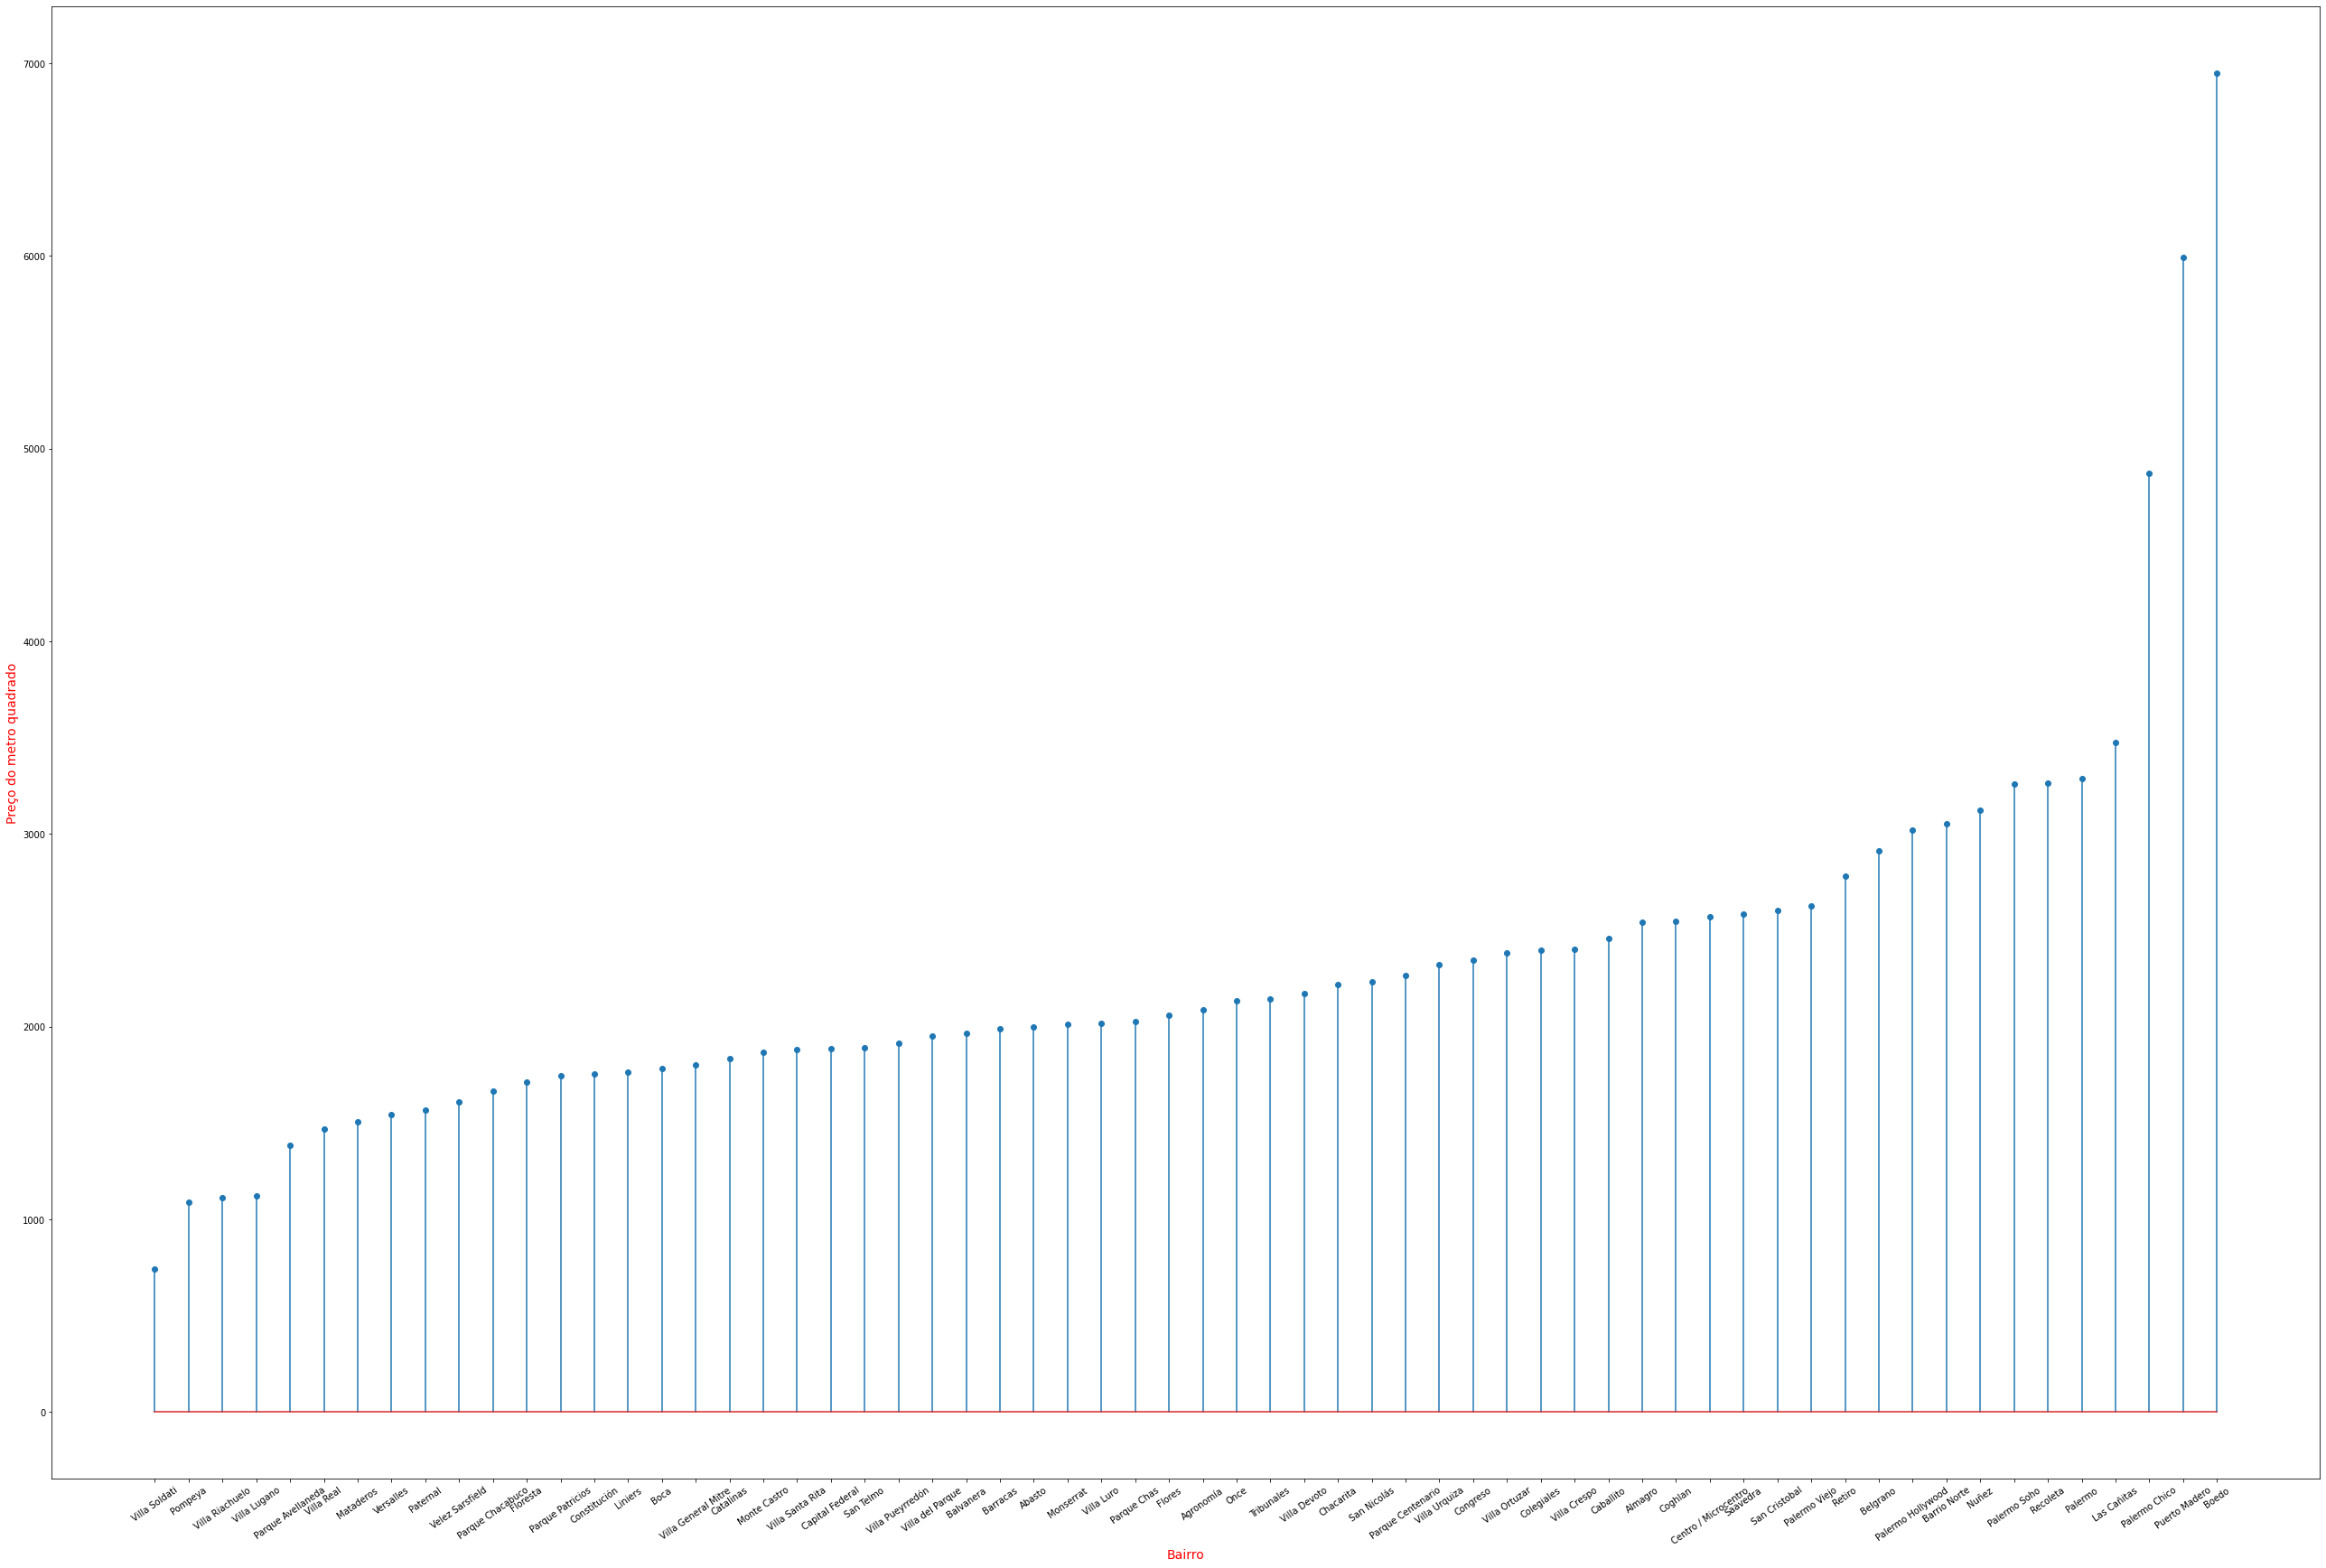

In [80]:
medias_bairro = medias_bairro.sort_values(by=['mean'], ascending=True)
plt.figure(figsize = (45, 30))
plt.xlabel('Bairro', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.stem(medias_bairro.index, medias_bairro['mean'])
plt.xticks(rotation = 35)
plt.show()

<h5>3.1.2. Máximo do preço do metro quadrado por bairro</h5>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


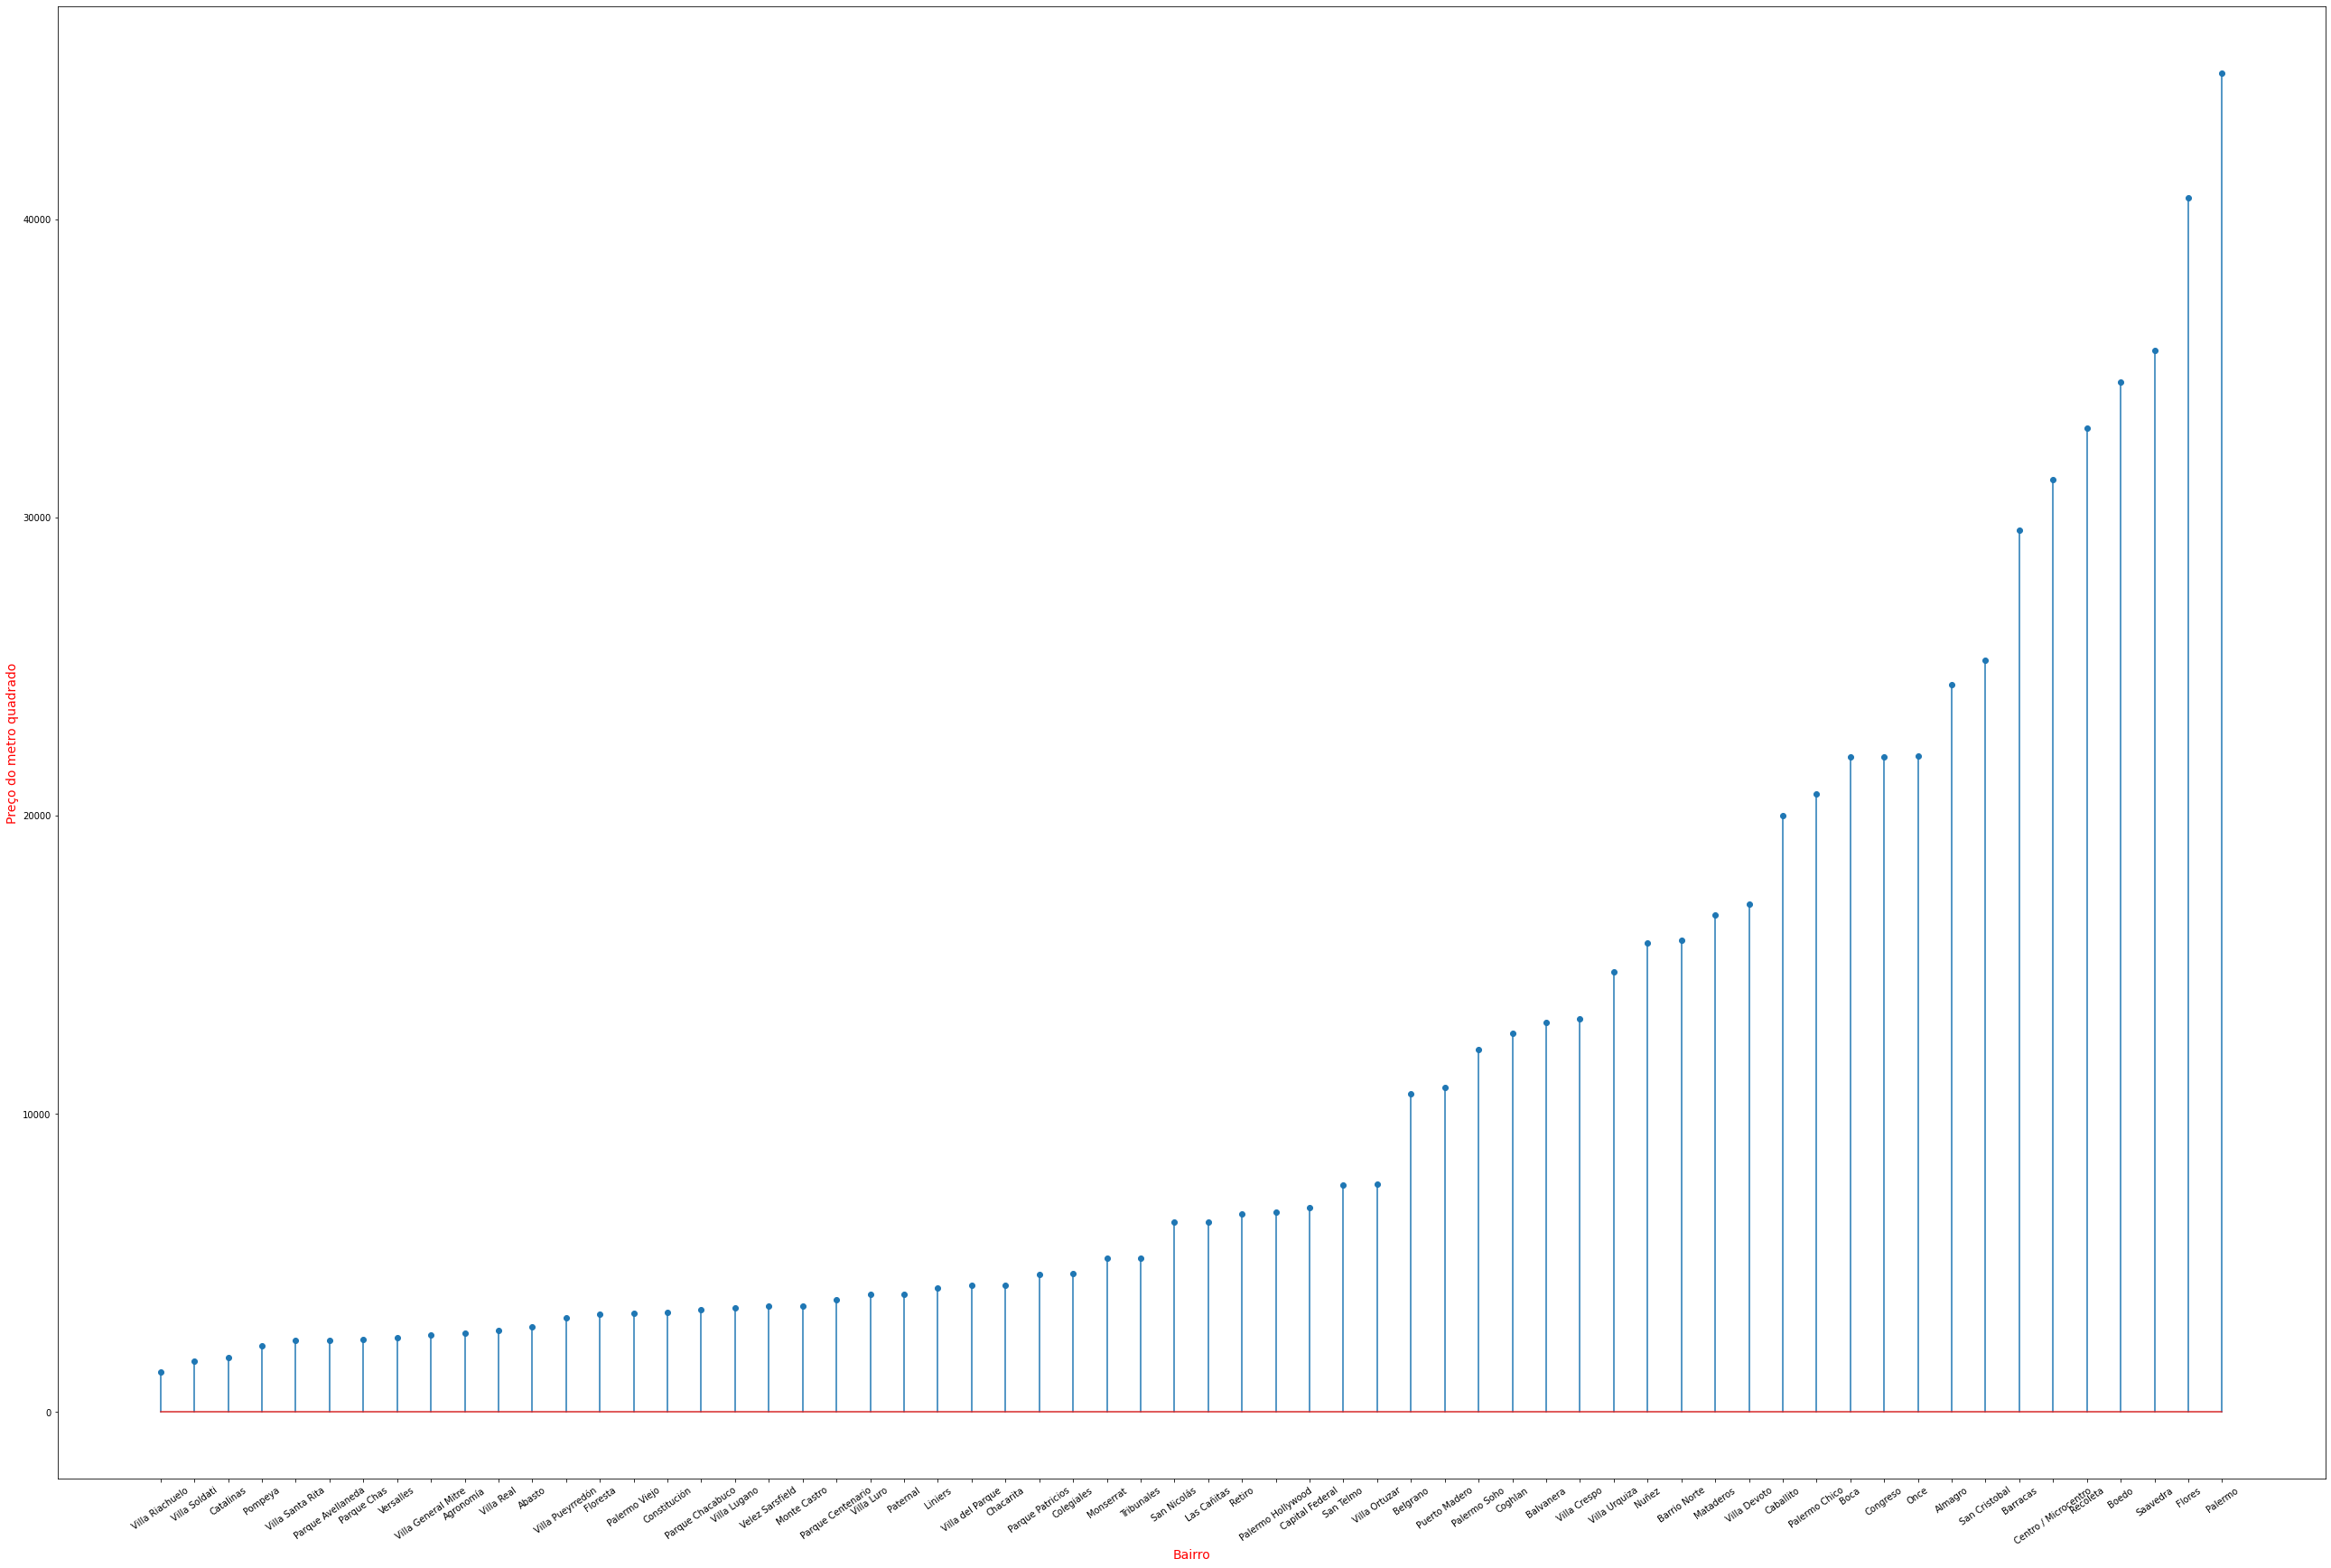

In [81]:
medias_bairro = medias_bairro.sort_values(by=['max'], ascending=True)
plt.figure(figsize = (45, 30))
plt.xlabel('Bairro', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.stem(medias_bairro.index, medias_bairro['max'])
plt.xticks(rotation = 35)
plt.show()

<h5>3.1.3. Mínimo do preço do metro quadrado por bairro</h5>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


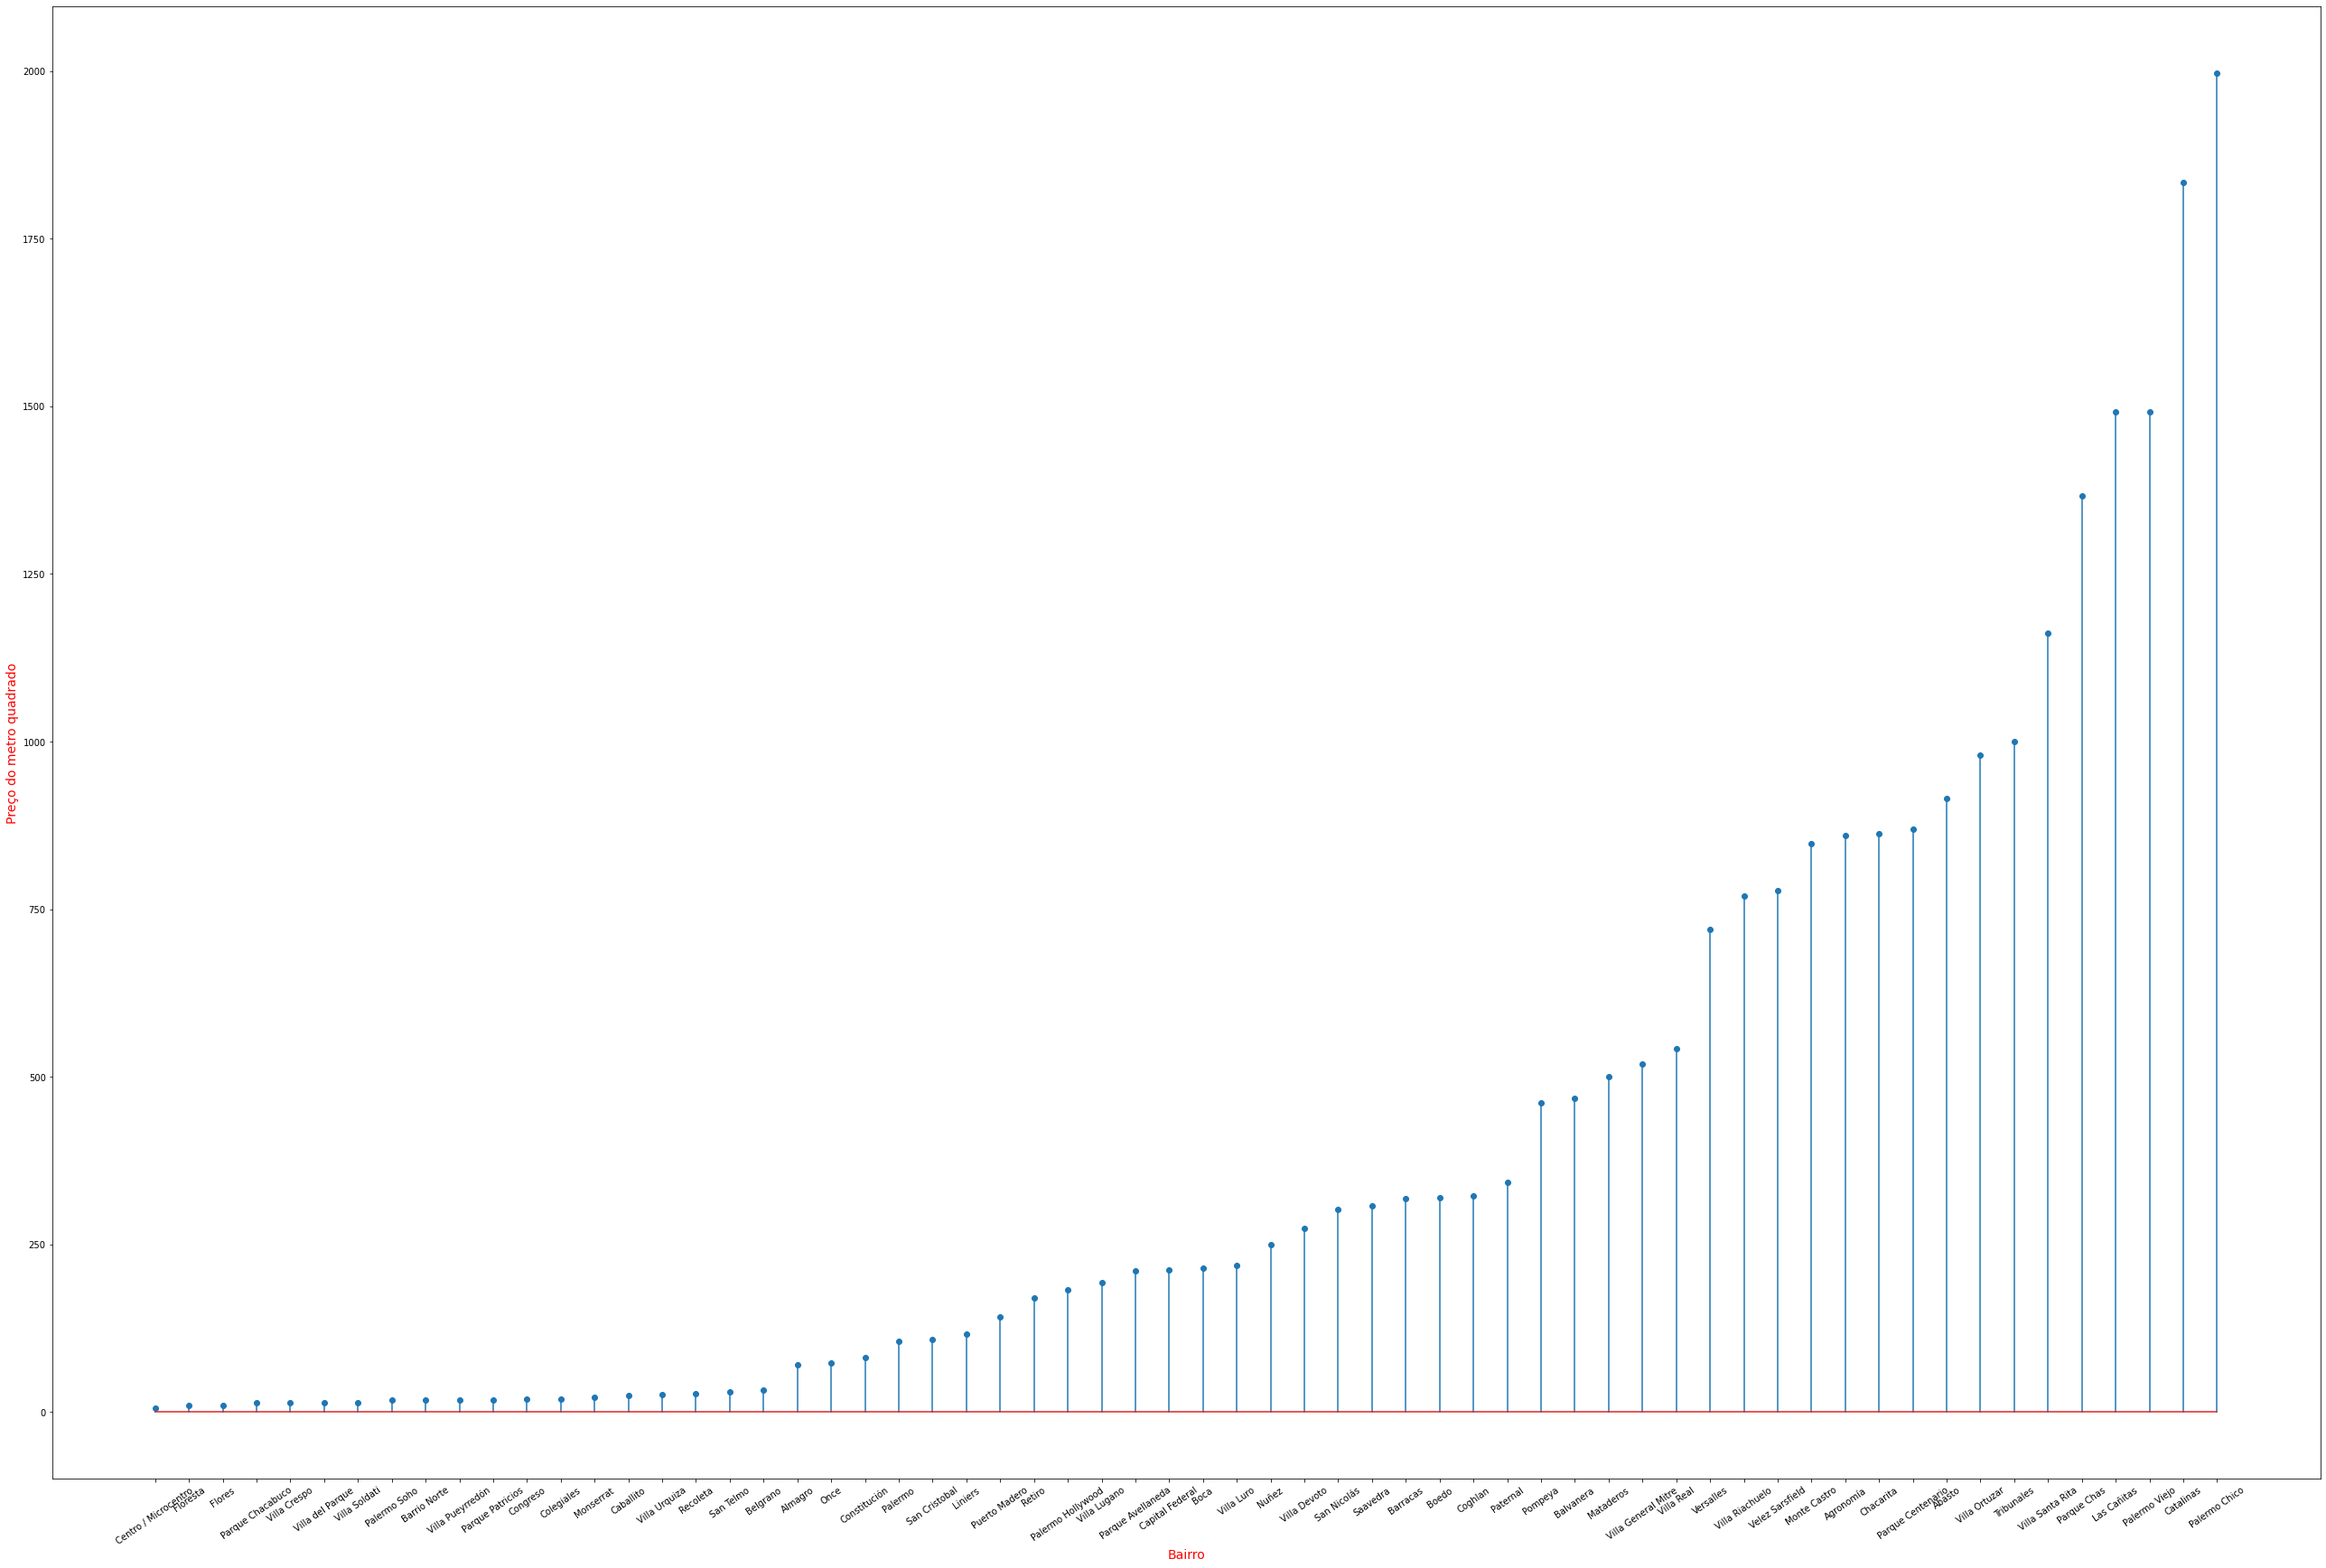

In [82]:
medias_bairro = medias_bairro.sort_values(by=['min'], ascending=True)
plt.figure(figsize = (45, 30))
plt.xlabel('Bairro', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.stem(medias_bairro.index, medias_bairro['min'])
plt.xticks(rotation = 35)
plt.show()

<h4>3.2. Preço do metro quadrado por tipo</h4>

In [83]:
medias_tipos = dfmerge.groupby(['property_type'])['preco_metro'].agg(['max','min','mean','median'])
medias_tipos

,max,min,mean,median
property_type,,,,
PH,25000.000000,18.333333,1695.710007,1625.000000
apartment,44900.000000,10.493827,2796.213417,2458.333333
house,23064.516129,214.592275,1716.153891,1451.163795
store,22000.000000,6.054795,2794.256221,2258.064516


<h5>3.2.1. Media do preço do metro quadrado por tipo</h5>

<BarContainer object of 4 artists>

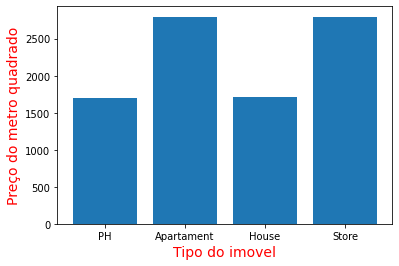

In [84]:
array = dfmerge.to_numpy()

PH = []
apartment = []
house = []
store = []

for i in range(len(array.T[0])):
    if array.T[0][i] == 'PH':
        PH.append(array.T[11][i])
    if array.T[0][i] == 'apartment':
        apartment.append(array.T[11][i])
    if array.T[0][i] == 'house':
        house.append(array.T[11][i])
    if array.T[0][i] == 'store':
        store.append(array.T[11][i])

media_PH = np.mean(PH)
media_ap = np.mean(apartment)
media_houseH = np.mean(house)
media_store = np.mean(store)

x = ['PH', 'Apartament', 'House', 'Store']

y = [media_PH, media_ap, media_houseH, media_store]


plt.xlabel('Tipo do imovel', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')

plt.bar (x, y)

<h5>3.2.2. Máximo do preço do metro quadrado por tipo</h5>

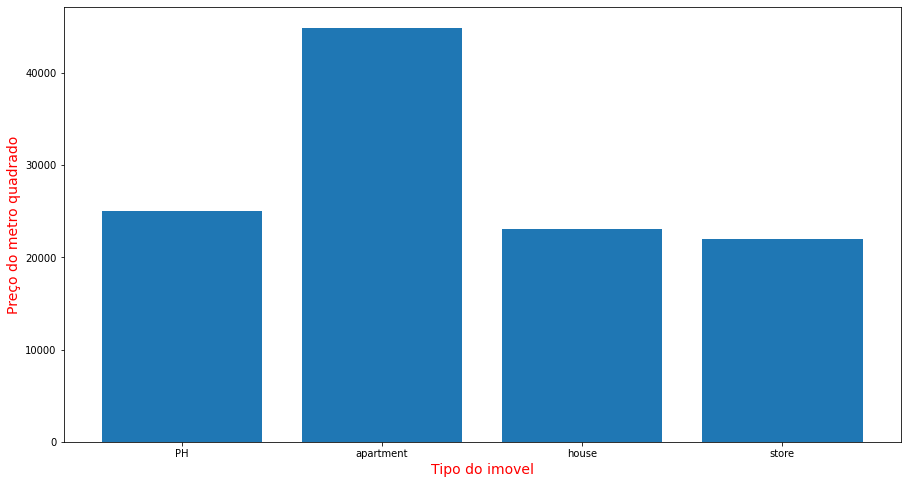

In [85]:
plt.figure(figsize = (15, 8))
plt.xlabel('Tipo do imovel', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.bar(medias_tipos.index, medias_tipos['max'])
plt.show()

<h5>3.2.3. Mínimo do preço do metro quadrado por tipo</h5>

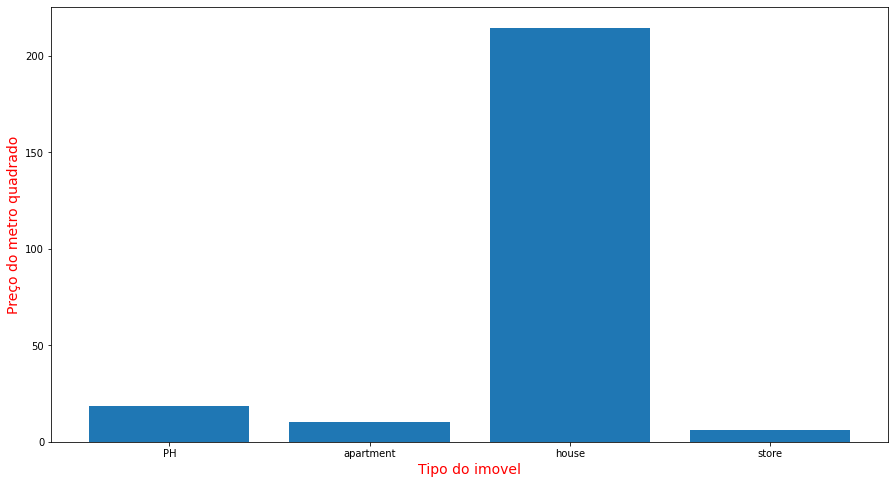

In [86]:
plt.figure(figsize = (15, 8))
plt.xlabel('Tipo do imovel', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.bar(medias_tipos.index, medias_tipos['min'])
plt.show()

<h4>3.3. Preço do metro quadrado por bairro e tipo</h4>

In [87]:
medias_bairro_tipos = dfmerge.groupby(['property_type','place_name'])['preco_metro'].agg(['max','min','mean','median'])
medias_bairro_tipos

max          min         mean  \
property_type place_name                                                
PH            Abasto            2400.000000   914.893617  1555.190277   
              Agronomía         2000.000000  1324.324324  1566.441441   
              Almagro           2738.095238   467.796610  1718.147054   
              Balvanera         1923.076923   467.796610  1382.313309   
              Barracas          2132.352941   590.219224  1245.198564   
...                                     ...          ...          ...   
store         Villa Ortuzar     2133.333333   979.381443  1561.804425   
              Villa Real        1346.153846  1346.153846  1346.153846   
              Villa Soldati      775.688994    13.797467   394.743231   
              Villa Urquiza     3687.943262  1045.454545  2354.089922   
              Villa del Parque  3289.473684    13.786585  1524.622315   

                                     median  
property_type place_name                     
PH            Abasto            1434.230769  
              Agronomía         1375.000000  
              Almagro           1677.272727  
              Balvanera         1350.147411  
              Barracas          1147.540984  
...                                     ...  
store         Villa Ortuzar     1567.251462  
              Villa Real        1346.153846  
              Villa Soldati      394.743231  
              Villa Urquiza     2198.797088  
              Villa del Parque  1400.000000  

[229 rows x 4 columns]

In [88]:
medias_bairro_tipos_final = medias_bairro_tipos.reset_index([ 'property_type','place_name' ])
medias_bairro_tipos_final['place_name_type'] = medias_bairro_tipos_final[['property_type', 'place_name']].apply(' '.join, axis=1)
medias_bairro_tipos_final

,property_type,place_name,max,min,mean,median,place_name_type
0,PH,Abasto,2400.000000,914.893617,1555.190277,1434.230769,PH Abasto
1,PH,Agronomía,2000.000000,1324.324324,1566.441441,1375.000000,PH Agronomía
2,PH,Almagro,2738.095238,467.796610,1718.147054,1677.272727,PH Almagro
3,PH,Balvanera,1923.076923,467.796610,1382.313309,1350.147411,PH Balvanera
4,PH,Barracas,2132.352941,590.219224,1245.198564,1147.540984,PH Barracas
...,...,...,...,...,...,...,...
224,store,Villa Ortuzar,2133.333333,979.381443,1561.804425,1567.251462,store Villa Ortuzar
225,store,Villa Real,1346.153846,1346.153846,1346.153846,1346.153846,store Villa Real
226,store,Villa Soldati,775.688994,13.797467,394.743231,394.743231,store Villa Soldati
227,store,Villa Urquiza,3687.943262,1045.454545,2354.089922,2198.797088,store Villa Urquiza


<h5>3.3.1. Media do preço do metro quadrado por bairro e tipo</h5>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


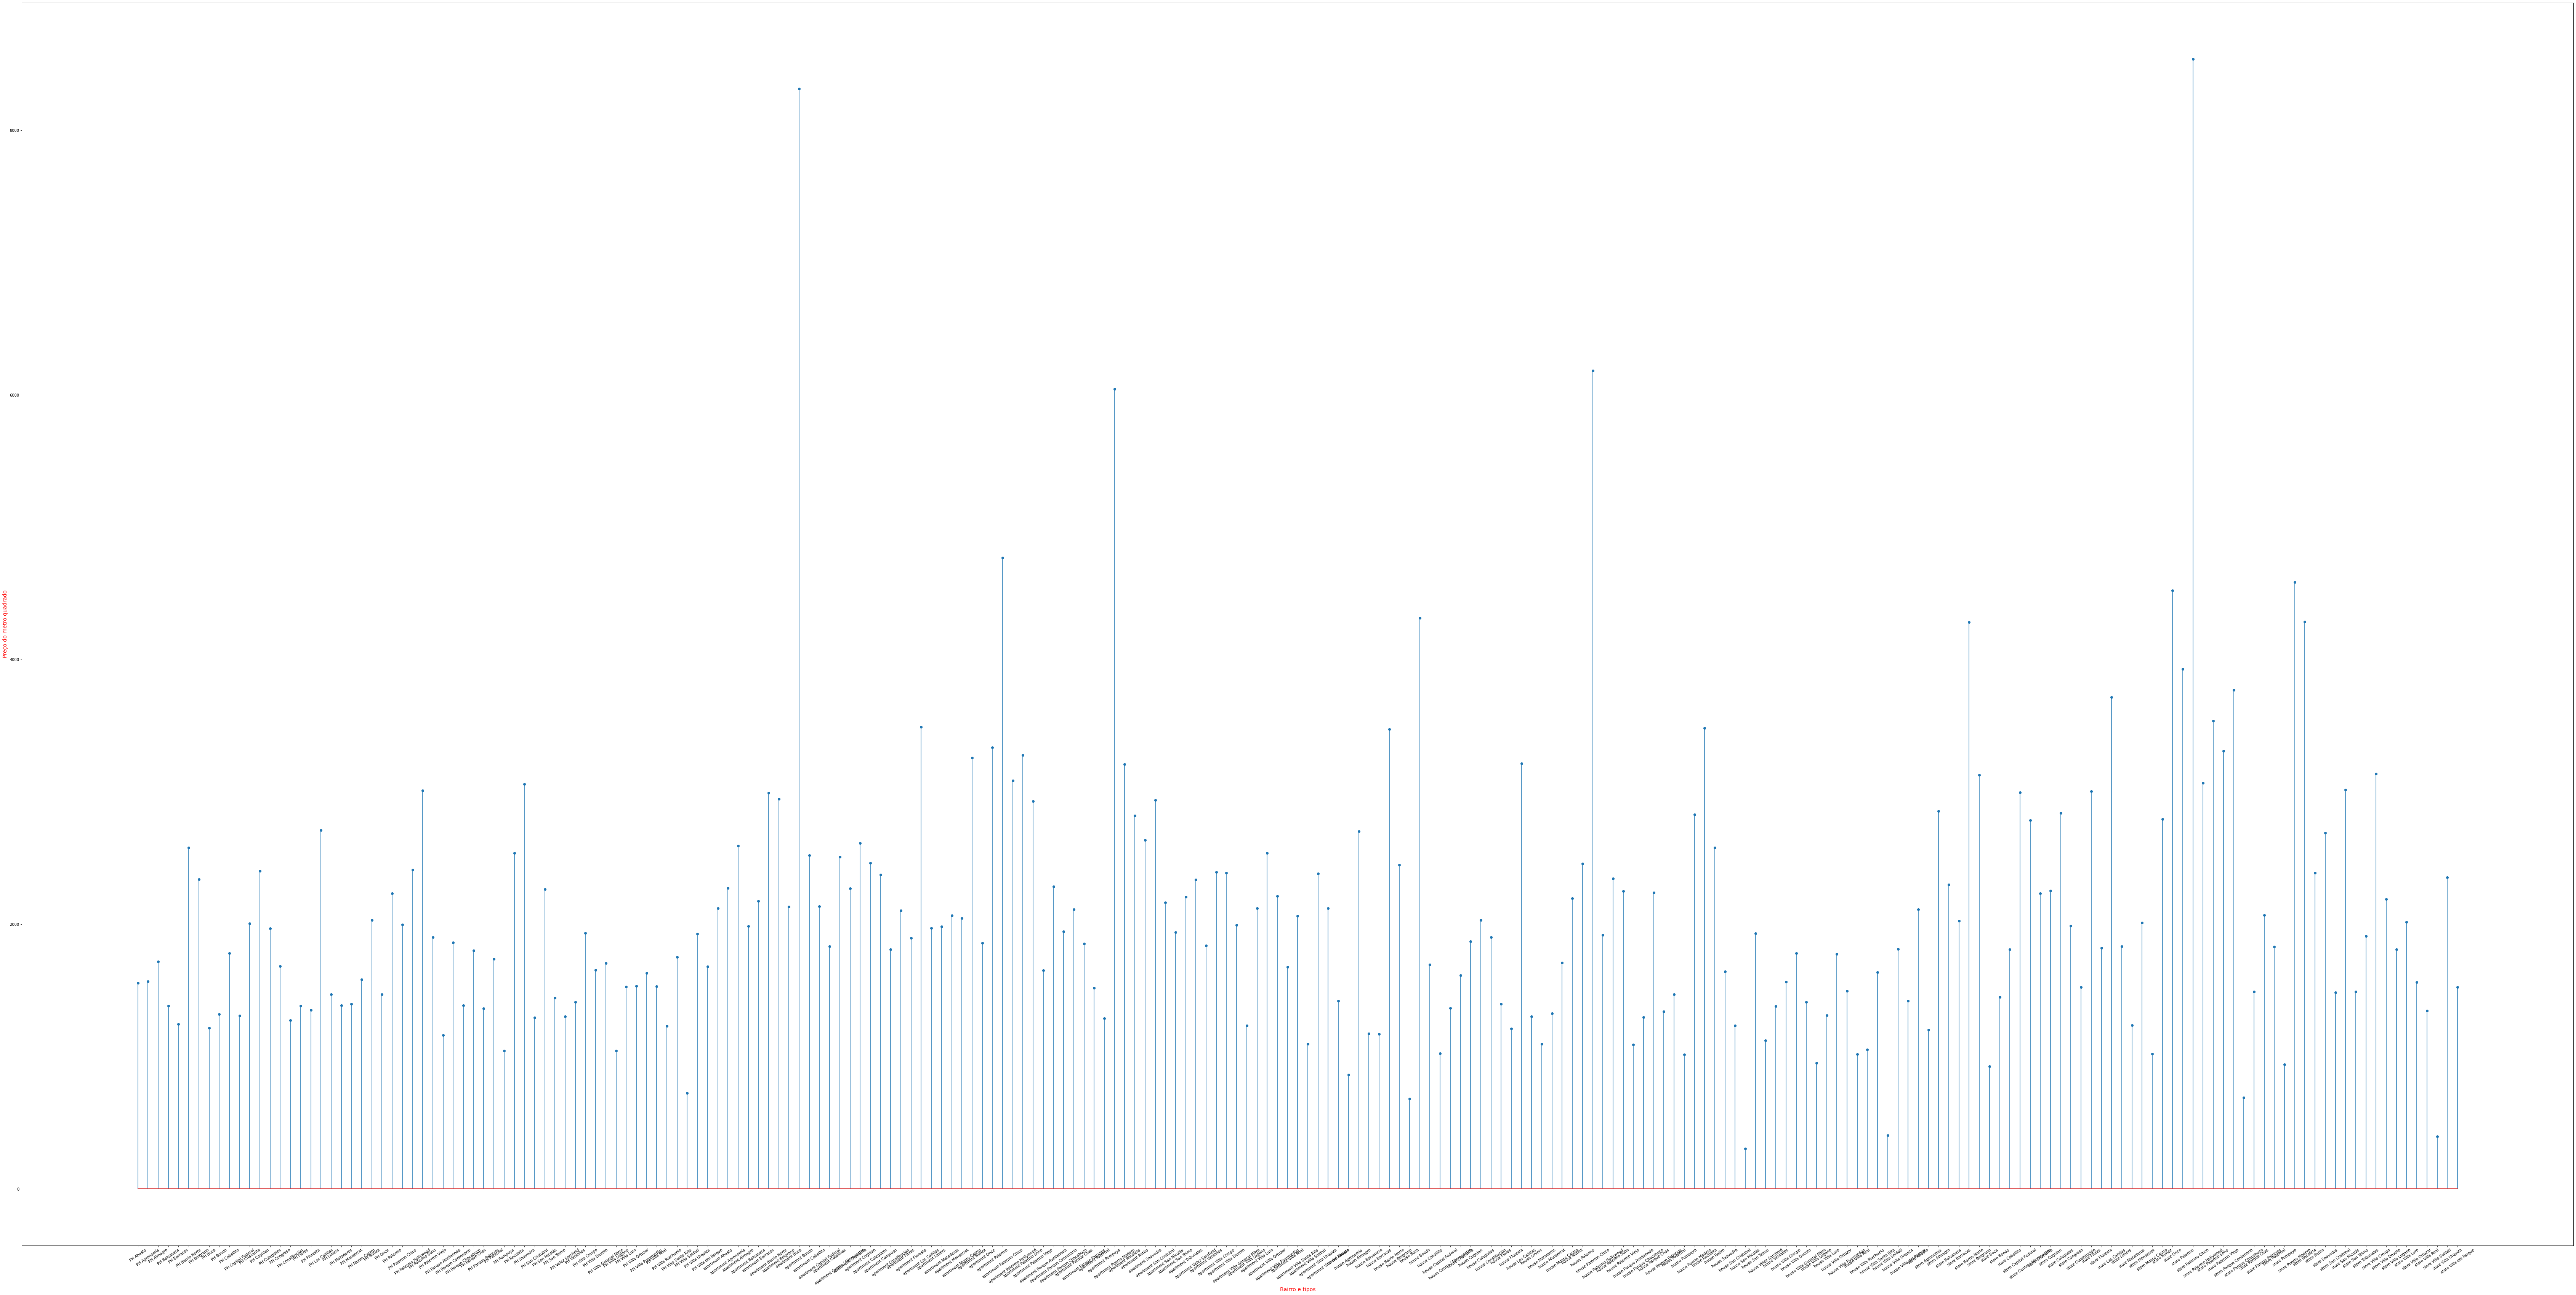

In [89]:
plt.figure(figsize = (120, 60))
plt.xlabel('Bairro e tipos', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.stem(medias_bairro_tipos_final.place_name_type, medias_bairro_tipos_final['mean'])
plt.xticks(rotation = 35)
plt.show()

<h4>3.4. Mapa de calor</h4>

In [90]:
map_hooray = folium.Map(location=[-34.62, -58.4],
                    zoom_start = 11) # Uses lat then lon. The bigger the zoom number, the closer in you get
map_hooray # Calls the map to display
#heat_df = dfmerge[dfmerge['Speed_limit']=='40'] # Reducing data size so it runs faster
#heat_df = dfmerge[dfmerge['Year']=='2007'] # Reducing data size so it runs faster
heat_df = dfmerge[['lat', 'lon']]
heat_df = heat_df.dropna(axis=0, subset=['lat','lon'])

# List comprehension to make out list of lists
heat_data = [[row['lat'],row['lon']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(map_hooray)

# Display the map
map_hooray

<p><h3>4. Os principais por preço do metro quadrado</h3></p>
<span>Demonstrar os cincos principais por valor do preço do metro quadrado</span>

<h4>4.1. Por localização do imovel</h4>

In [91]:
medias_bairro_ordenada= medias_bairro.sort_values(by=['mean'], ascending=False)
medias_bairro_ordenada

,max,min,mean,median
place_name,,,,
Boedo,34534.482759,320.362069,6949.329908,1951.219512
Puerto Madero,10869.565217,141.666667,5990.617770,5802.177964
Palermo Chico,20731.707317,1997.126437,4873.497964,4280.307802
Las Cañitas,6370.967742,1491.017964,3476.175811,3342.275281
Palermo,44900.000000,105.555556,3287.429045,3004.237288
...,...,...,...,...
Parque Avellaneda,2407.407407,211.111111,1384.643386,1428.571429
Villa Lugano,3478.260870,193.701923,1121.248006,1064.285714
Villa Riachuelo,1333.333333,769.230769,1110.690766,1229.508197


<h5>4.1.1. Maior custo por metro quadrado</h5>

In [92]:
medias_bairro_ordenada_5_maior=medias_bairro_ordenada.head(5)
medias_bairro_ordenada_5_maior

,max,min,mean,median
place_name,,,,
Boedo,34534.482759,320.362069,6949.329908,1951.219512
Puerto Madero,10869.565217,141.666667,5990.617770,5802.177964
Palermo Chico,20731.707317,1997.126437,4873.497964,4280.307802
Las Cañitas,6370.967742,1491.017964,3476.175811,3342.275281
Palermo,44900.000000,105.555556,3287.429045,3004.237288


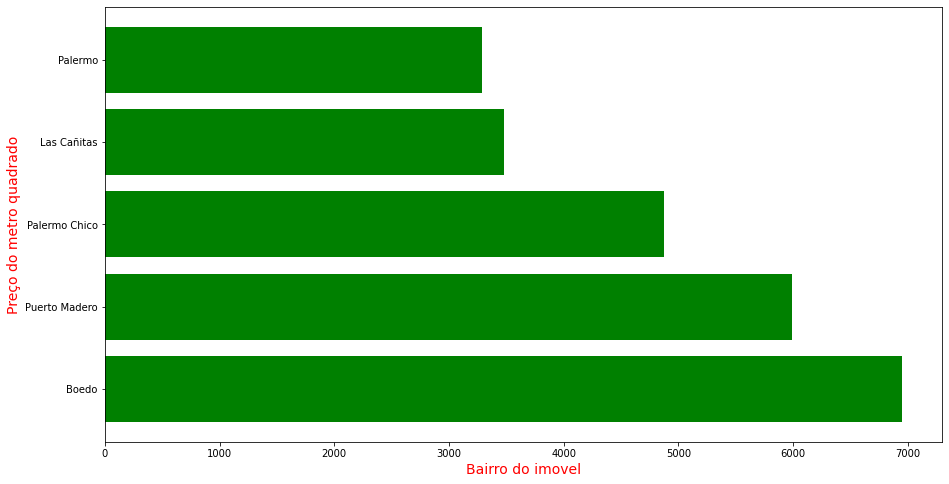

In [93]:
plt.figure(figsize = (15, 8))
plt.xlabel('Bairro do imovel', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.barh(medias_bairro_ordenada_5_maior.index, medias_bairro_ordenada_5_maior['mean'], color='green')
plt.show()

<h5>4.1.2. Menor custo por metro quadrado</h5>

In [94]:
medias_bairro_ordenada_5_menor=medias_bairro_ordenada.tail(5)
medias_bairro_ordenada_5_menor.sort_values(by=['mean'], ascending=True)

,max,min,mean,median
place_name,,,,
Villa Soldati,1720.000000,13.797467,743.666758,775.688994
Pompeya,2227.272727,461.538462,1090.532024,975.409836
Villa Riachuelo,1333.333333,769.230769,1110.690766,1229.508197
Villa Lugano,3478.260870,193.701923,1121.248006,1064.285714
Parque Avellaneda,2407.407407,211.111111,1384.643386,1428.571429


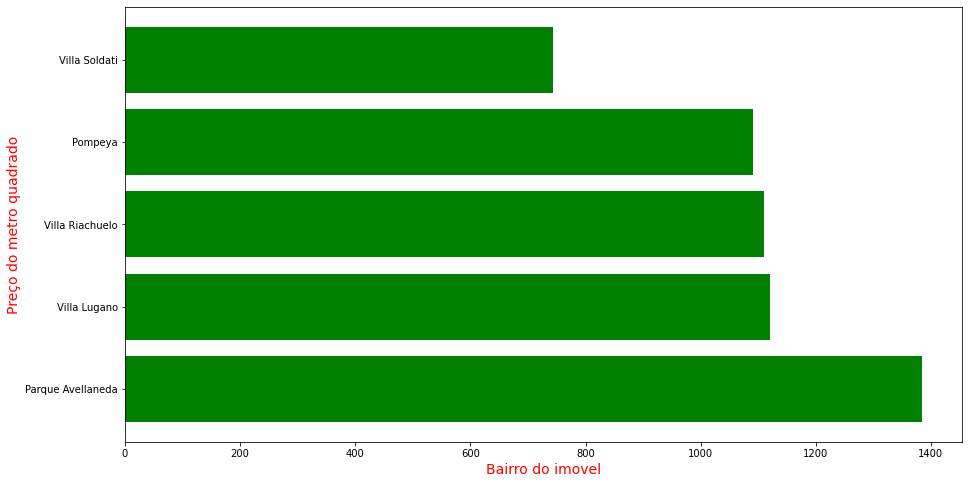

In [95]:
plt.figure(figsize = (15, 8))
plt.xlabel('Bairro do imovel', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.barh(medias_bairro_ordenada_5_menor.index, medias_bairro_ordenada_5_menor['mean'],color='green')
plt.show()

<h4>4.2. Por localização e tipo do imovel</h4>

In [96]:
medias_bairro_tipos_ordenada= medias_bairro_tipos_final.sort_values(by=['mean'], ascending=False)
medias_bairro_tipos_ordenada

,property_type,place_name,max,min,mean,median,place_name_type
202,store,Palermo Chico,8536.585366,8536.585366,8536.585366,8536.585366,store Palermo Chico
65,apartment,Boedo,34534.482759,320.362069,8313.162753,2200.000000,apartment Boedo
143,house,Palermo Chico,12121.212121,4417.177914,6183.271852,5527.777778,house Palermo Chico
96,apartment,Puerto Madero,10869.565217,2964.912281,6045.233312,5825.966153,apartment Puerto Madero
85,apartment,Palermo Chico,20731.707317,2322.580645,4769.882630,4177.927928,apartment Palermo Chico
...,...,...,...,...,...,...,...
207,store,Parque Chacabuco,722.543353,657.657658,690.100505,690.100505,store Parque Chacabuco
125,house,Boca,1423.357664,214.592275,678.966726,628.835307,house Boca
172,house,Villa Soldati,403.361345,403.361345,403.361345,403.361345,house Villa Soldati
226,store,Villa Soldati,775.688994,13.797467,394.743231,394.743231,store Villa Soldati


<h5>4.2.1. Maior custo por metro quadrado</h5>

In [97]:

medias_bairro_tipos_ordenada_5_maior=medias_bairro_tipos_ordenada.head(5)
medias_bairro_tipos_ordenada_5_maior


,property_type,place_name,max,min,mean,median,place_name_type
202,store,Palermo Chico,8536.585366,8536.585366,8536.585366,8536.585366,store Palermo Chico
65,apartment,Boedo,34534.482759,320.362069,8313.162753,2200.000000,apartment Boedo
143,house,Palermo Chico,12121.212121,4417.177914,6183.271852,5527.777778,house Palermo Chico
96,apartment,Puerto Madero,10869.565217,2964.912281,6045.233312,5825.966153,apartment Puerto Madero
85,apartment,Palermo Chico,20731.707317,2322.580645,4769.882630,4177.927928,apartment Palermo Chico


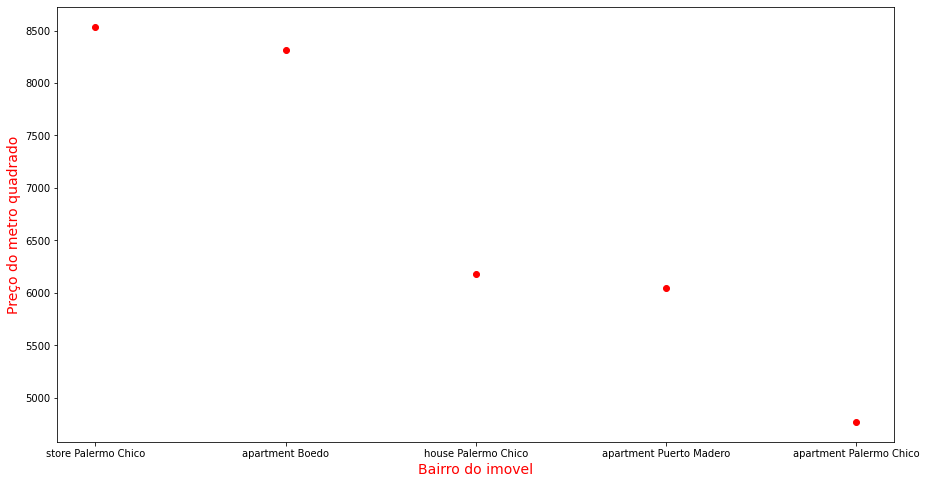

In [98]:
plt.figure(figsize = (15, 8))
plt.xlabel('Bairro do imovel', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.scatter(medias_bairro_tipos_ordenada_5_maior.place_name_type, medias_bairro_tipos_ordenada_5_maior['mean'],color='red')
plt.show()

<h5>4.2.2. Menor custo por metro quadrado</h5>

In [99]:
medias_bairro_tipos_ordenada_5_menor=medias_bairro_tipos_ordenada.tail(5)
medias_bairro_tipos_ordenada_5_menor.sort_values(by=['mean'], ascending=True)

,property_type,place_name,max,min,mean,median,place_name_type
158,house,San Nicolás,301.984469,301.984469,301.984469,301.984469,house San Nicolás
226,store,Villa Soldati,775.688994,13.797467,394.743231,394.743231,store Villa Soldati
172,house,Villa Soldati,403.361345,403.361345,403.361345,403.361345,house Villa Soldati
125,house,Boca,1423.357664,214.592275,678.966726,628.835307,house Boca
207,store,Parque Chacabuco,722.543353,657.657658,690.100505,690.100505,store Parque Chacabuco


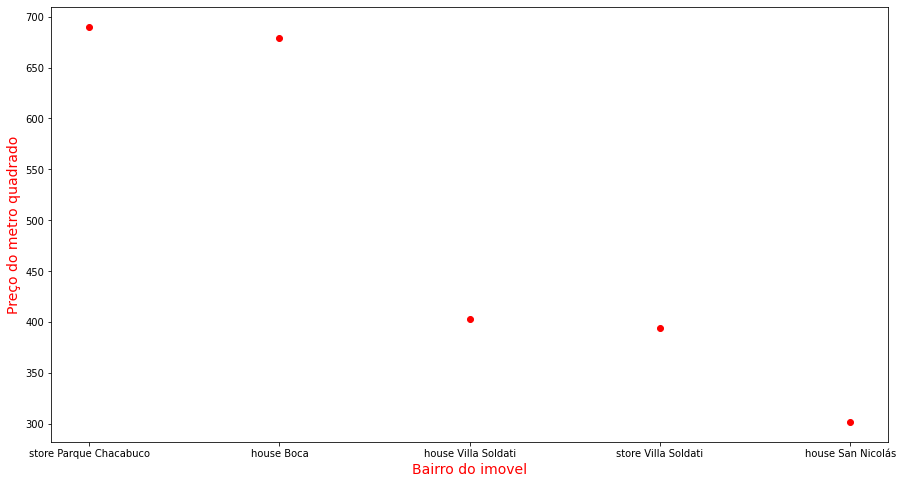

In [100]:
plt.figure(figsize = (15, 8))
plt.xlabel('Bairro do imovel', fontsize=14, color='red')
plt.ylabel('Preço do metro quadrado', fontsize=14, color='red')
plt.scatter(medias_bairro_tipos_ordenada_5_menor.place_name_type, medias_bairro_tipos_ordenada_5_menor['mean'],color='red')
plt.show()

<p><h3>5. Boxplot</h3></p>

In [101]:
#criei uma tabela para cada tipo

df_PH = dfmerge[dfmerge['property_type'].isin(['PH'])]

df_apartment = dfmerge[dfmerge['property_type'].isin(['apartment'])]

df_house = dfmerge[dfmerge['property_type'].isin(['house'])]

df_store = dfmerge[dfmerge['property_type'].isin(['store'])]


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


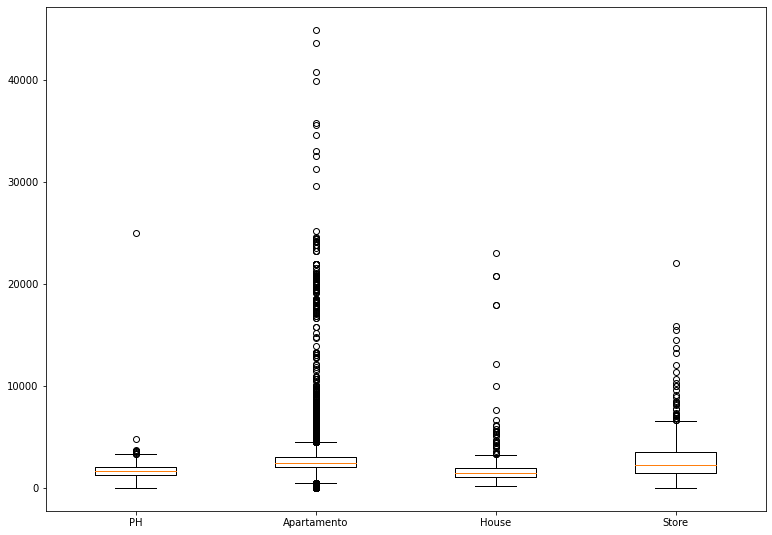

In [102]:
data_PH = df_PH['preco_metro'].tolist()
data_apartment = df_apartment['preco_metro'].tolist()
data_house = df_house['preco_metro'].tolist()
data_store = df_store['preco_metro'].tolist()

legenda = ['PH','Apartamento','House','Store']

data_boxplot = [data_PH, data_apartment, data_house, data_store]

fig = plt.figure(figsize =(10, 7))

ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(data_boxplot,
               labels = legenda)

plt.show()

<h3>6. Macros Região</h3>

<h4>6.1. Metros quadrados totais por bairro</h4>

In [103]:
soma_bairros = dfmerge.groupby(['place_name'])['surface_total_in_m2_Final'].agg(['sum'])
soma_bairros_ordenado = soma_bairros.sort_values(by=['sum'], ascending=False)


soma_bairros_ordenado

,sum
place_name,
San Telmo,258565.000000
Belgrano,170015.000000
Palermo,149636.000000
Recoleta,130493.892209
Caballito,113526.985075
...,...
Agronomía,2379.000000
Parque Chas,1315.000000
Palermo Viejo,956.000000


In [104]:
soma_bairros_9 = soma_bairros_ordenado.head(9)
soma_bairros_9 = soma_bairros_9.reset_index(['place_name'])

soma_bairros_9

,place_name,sum
0,San Telmo,258565.000000
1,Belgrano,170015.000000
2,Palermo,149636.000000
3,Recoleta,130493.892209
4,Caballito,113526.985075
5,Flores,80390.000000
6,Barrio Norte,77855.368571
7,Capital Federal,72527.000000
8,Almagro,61908.000000


In [105]:
todos = soma_bairros_ordenado[9:62].agg(['sum',])
todos


,sum
sum,917695.714407


In [106]:
soma_bairros_10 = soma_bairros_9.append(todos)


soma_bairros_final = soma_bairros_10.fillna('Outros')

soma_bairros_final

,place_name,sum
0,San Telmo,258565.000000
1,Belgrano,170015.000000
2,Palermo,149636.000000
3,Recoleta,130493.892209
4,Caballito,113526.985075
5,Flores,80390.000000
6,Barrio Norte,77855.368571
7,Capital Federal,72527.000000
8,Almagro,61908.000000
sum,Outros,917695.714407


In [107]:
# convert_dict = {'sum': int}

# soma_bairros_final = soma_bairros_final.astype(convert_dict)

soma_bairros_final = soma_bairros_10

soma_bairros_final.rename(columns = {'sum':'Soma'}, inplace = True)

soma_bairros_final = soma_bairros_10.fillna('Outros')

soma_bairros_final

,place_name,Soma
0,San Telmo,258565.000000
1,Belgrano,170015.000000
2,Palermo,149636.000000
3,Recoleta,130493.892209
4,Caballito,113526.985075
5,Flores,80390.000000
6,Barrio Norte,77855.368571
7,Capital Federal,72527.000000
8,Almagro,61908.000000
sum,Outros,917695.714407


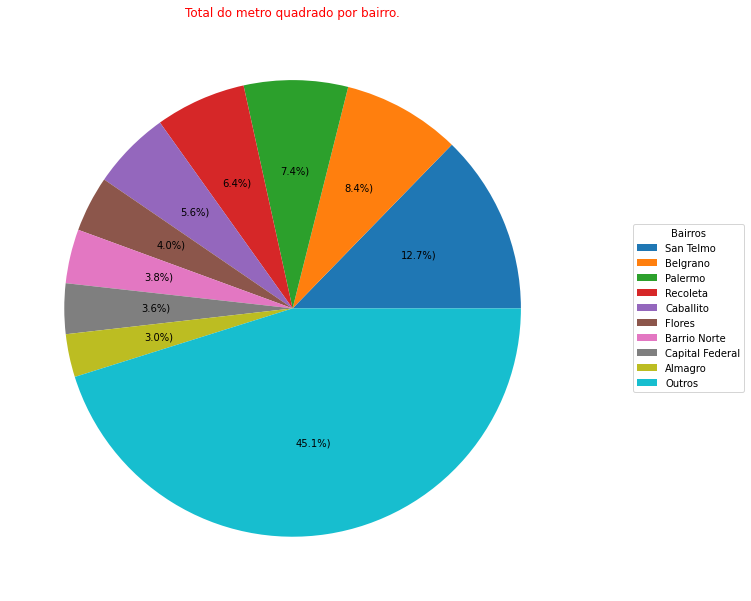

<Figure size 720x504 with 0 Axes>

In [108]:

def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%)".format(pct, absolute) 

fig, ax = plt.subplots(figsize =(15, 10.5)) 
wedges, texts, autotexts = ax.pie(soma_bairros_final.Soma, 
                                  autopct = lambda pct: func(pct, soma_bairros_final.Soma),
                                  #labels = soma_bairros_final.place_name)
                                 )
fig, ax.legend(wedges, soma_bairros_final.place_name,
              title = "Bairros",
              loc = "center right",
              bbox_to_anchor = (1, 0, 0.3, 1))
                                
plt.title('Total do metro quadrado por bairro.', color='red')

fig = plt.figure(figsize =(10, 7)) 



#plt.pie(soma_bairros_final.Soma, labels = soma_bairros_final.place_name)
 
#plt.show()9

<h4>6.2. Bairros com maior somatória de preço</h4>

In [109]:
soma_preco = dfmerge.groupby(['place_name'])['price_usd'].agg(['sum'])
soma_preco_ordenado = soma_preco.sort_values(by=['sum'], ascending=False)

soma_preco_10 = soma_preco_ordenado.head(10)
soma_preco_10 = soma_preco_10.reset_index(['place_name'])

soma_preco_10

,place_name,sum
0,Belgrano,4.992549e+08
1,Palermo,4.955148e+08
2,Recoleta,4.337064e+08
3,Puerto Madero,3.478511e+08
4,Caballito,2.600270e+08
5,Barrio Norte,2.374276e+08
6,Palermo Chico,1.606518e+08
7,Flores,1.536502e+08
8,Nuñez,1.469756e+08
9,San Telmo,1.383404e+08


In [110]:
soma_preco_10.rename(columns = {'sum':'Soma'}, inplace = True)
soma_preco_10

,place_name,Soma
0,Belgrano,4.992549e+08
1,Palermo,4.955148e+08
2,Recoleta,4.337064e+08
3,Puerto Madero,3.478511e+08
4,Caballito,2.600270e+08
5,Barrio Norte,2.374276e+08
6,Palermo Chico,1.606518e+08
7,Flores,1.536502e+08
8,Nuñez,1.469756e+08
9,San Telmo,1.383404e+08


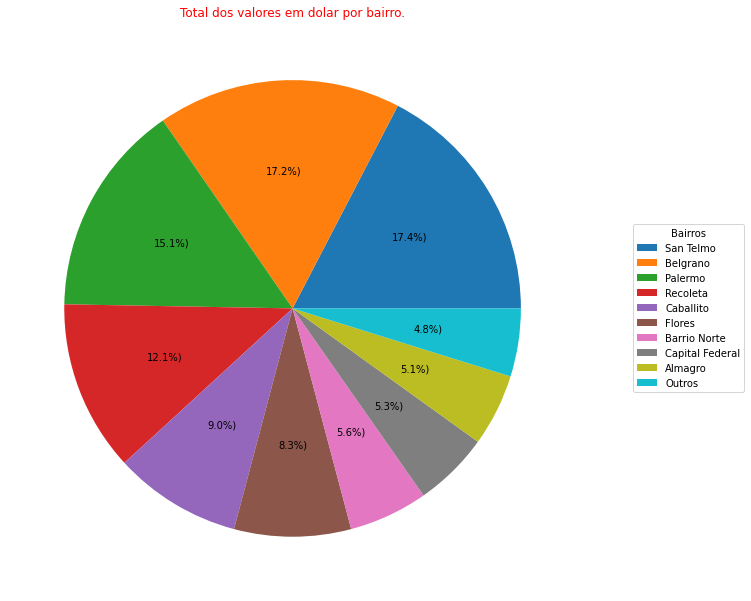

<Figure size 720x504 with 0 Axes>

In [111]:

def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%)".format(pct, absolute) 
fig, ax = plt.subplots(figsize =(15, 10.5)) 
wedges, texts, autotexts = ax.pie(soma_preco_10.Soma, 
                                  autopct = lambda pct: func(pct, soma_preco_10.Soma),
                                  #labels = soma_preco_10.place_name
                                 )
fig, ax.legend(wedges, soma_bairros_final.place_name,
              title = "Bairros",
              loc = "center right",
              bbox_to_anchor = (1, 0, 0.3, 1))

plt.title('Total dos valores em dolar por bairro.', color='red')

fig = plt.figure(figsize =(10, 7)) 




#fig = plt.figure(figsize =(10, 7)) 
#plt.pie(soma_preco_10.Soma, labels = soma_preco_10.place_name)
#plt.show()

<h2>TRABALHO PRÁTICO II</h2>

<p><h3>7. Selecionando as informações</h3></p>
<span>Para o subconjunto, o tipo de propriedade escolhido foi o tipo "Apartment", pois é o unico tipo com registros suficientes para o trabalho. Os bairros ecolhidos foram Recoleta e Palermo, por serem bairros próximos um do outro e com grande quatidade de apartamentos.</span>

In [112]:
dfApartament = dfmerge[(dfmerge["property_type"] == "apartment") & ((dfmerge["place_name"] == "Recoleta") | (dfmerge["place_name"] == "Palermo"))]
dfApartament

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2_media,surface_total_in_m2_Final,price_usd,preco_metro
1509,apartment,Palermo,Argentina,Capital Federal,-34.580504,-58.405874,350000.0,USD,90.108859,104.0,350000.0,3365.384615
1510,apartment,Palermo,Argentina,Capital Federal,-34.590926,-58.411665,270500.0,USD,90.108859,118.0,270500.0,2292.372881
1511,apartment,Palermo,Argentina,Capital Federal,-34.588862,-58.412307,147300.0,USD,90.108859,39.0,147300.0,3776.923077
1512,apartment,Palermo,Argentina,Capital Federal,-34.566479,-58.434075,440000.0,USD,90.108859,175.0,440000.0,2514.285714
1513,apartment,Palermo,Argentina,Capital Federal,-34.590243,-58.436402,179000.0,USD,90.108859,70.0,179000.0,2557.142857
...,...,...,...,...,...,...,...,...,...,...,...,...
6942,apartment,Recoleta,Argentina,Capital Federal,-34.594886,-58.404803,258000.0,USD,127.892209,115.0,258000.0,2243.478261
6943,apartment,Recoleta,Argentina,Capital Federal,-34.590285,-58.400306,170000.0,USD,127.892209,71.0,170000.0,2394.366197
6944,apartment,Recoleta,Argentina,Capital Federal,-34.593480,-58.405057,265000.0,USD,127.892209,84.0,265000.0,3154.761905
6945,apartment,Recoleta,Argentina,Capital Federal,-34.590628,-58.397539,325000.0,USD,127.892209,113.0,325000.0,2876.106195


<h3>8. Regressão Linear</h3>

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

<h4>8.1. Regressão linear simples</h4>

Avaliação de Desempenho:
MSE: 42076207770.59661
RMSE: 205124.8589776398
MAE: 105106.98395402894
R2: 0.6970100352891391


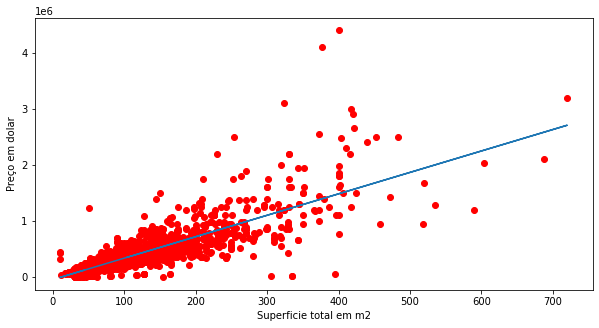

In [114]:
dadosApartment = ["price_usd",'surface_total_in_m2_Final']
dfAp = dfApartament[dadosApartment]

eixo_x = dfAp.iloc[:,1].values
eixo_y = dfAp.iloc[:,0].values

#Tranformando os dados em matriz
eixo_x = eixo_x.reshape(-1, 1)
eixo_y = eixo_y.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
funcao_Regressao = LinearRegression()
funcao_Regressao.fit( eixo_x, eixo_y )
y_est = funcao_Regressao.predict(eixo_x)

plt.figure(figsize = (10,5))
plt.scatter(eixo_x, eixo_y, color='red' )
plt.plot( eixo_x, y_est)

plt.xlabel('Superficie total em m2')
plt.ylabel('Preço em dolar')

#Avaliando desempemho
print ("Avaliação de Desempenho:")
previsoes = y_est
print ("MSE:", metrics.mean_squared_error(eixo_y, previsoes))
print ("RMSE:",np.sqrt(metrics.mean_squared_error(eixo_y, previsoes)) )
print ('MAE:', metrics.mean_absolute_error(eixo_y, previsoes))
print ('R2:', metrics.r2_score(eixo_y, previsoes))

Avaliação de Desempenho:
MSE: 3438200.444565922
RMSE: 1854.2385080042757
MAE: 890.8479766602733
R2: 0.005504611003482651


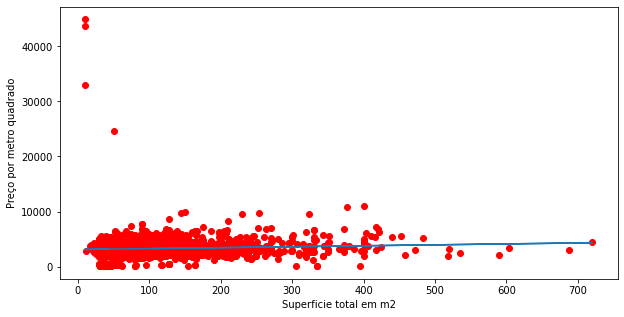

In [115]:
dadosApartment = ["preco_metro",'surface_total_in_m2_Final']
dfAp = dfApartament[dadosApartment]

eixo_x = dfAp.iloc[:,1].values
eixo_y = dfAp.iloc[:,0].values

#Tranformando os dados em matriz
eixo_x = eixo_x.reshape(-1, 1)
eixo_y = eixo_y.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
funcao_Regressao = LinearRegression()
funcao_Regressao.fit( eixo_x, eixo_y )
y_est = funcao_Regressao.predict(eixo_x)

plt.figure(figsize = (10,5))
plt.scatter(eixo_x, eixo_y, color='red' )
plt.plot( eixo_x, y_est)

plt.xlabel('Superficie total em m2')
plt.ylabel('Preço por metro quadrado')

#Avaliando desempemho
print ("Avaliação de Desempenho:")
previsoes = y_est
print ("MSE:", metrics.mean_squared_error(eixo_y, previsoes))
print ("RMSE:",np.sqrt(metrics.mean_squared_error(eixo_y, previsoes)) )
print ('MAE:', metrics.mean_absolute_error(eixo_y, previsoes))
print ('R2:', metrics.r2_score(eixo_y, previsoes))

<h4>8.2. Regressão mútipla</h4>

In [116]:
def sum_mod(model, X, y):
    '''
    model: objeto com o modelo
    X: matrix de variáveis independientes
    
    a = a.append(pd.DataFrame([model.intercept_, model.score(X, y)], 
                              index = ['Intecept','R2']
                             )
                )
    '''
    a = pd.DataFrame(model.coef_ , X.columns.values)
    a = a.append(pd.DataFrame([model.intercept_, model.score(X, y)], 
                              index = ['Intecept','R2']
                             )
                )
    print(a)
    

Intercepto =    668693.1662000365
RM =    [1.83370224e+04 5.44722783e+02 1.91174863e-03]
R2_train =    0.19577928935681155
MSE: 840559.94852931
RMSE: 916.8205650667473
MAE: 704.5320888094699
R2: 0.19577928935681155


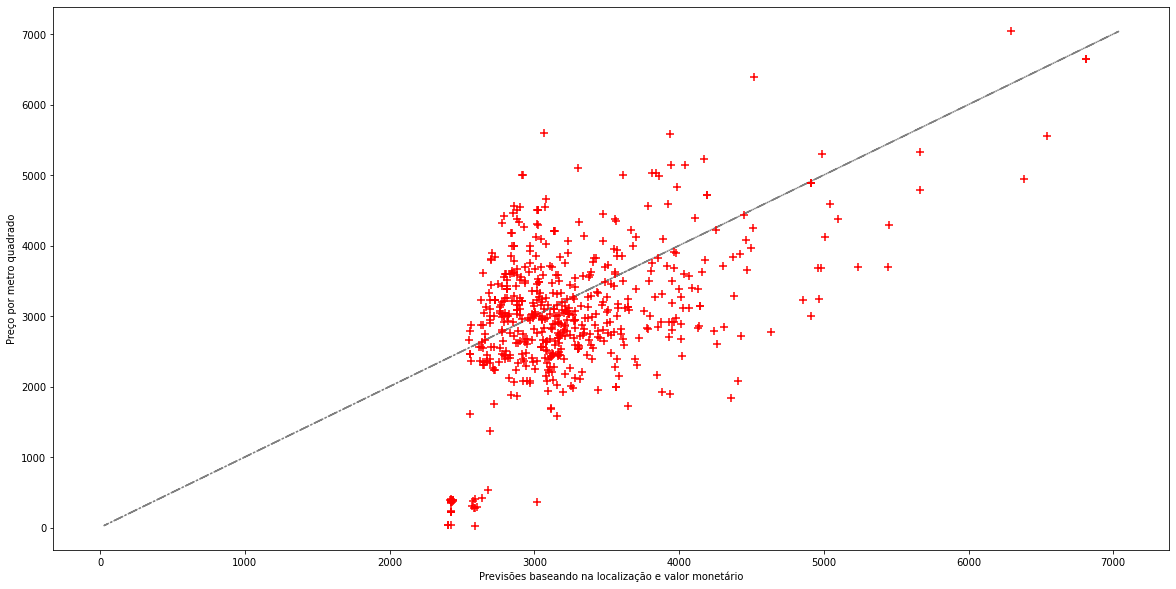

In [117]:
def grafico(y,predictions):
    plt.figure(figsize = (20,10))
    plt.plot(y, 
         y, 
         '-.', 
         c = 'grey'
        )
    
    plt.scatter(predictions, 
            y, 
            s = 50, 
            c = 'r', 
            marker = '+', 
            zorder = 10
           )   
    
    plt.xlabel("Previsões baseando na localização e valor monetário")
    plt.ylabel("Preço por metro quadrado")
    plt.show()
    
def info(model,X, y, predictions):
    print ('Intercepto = ', ' ', model.intercept_)
    print ('RM = ', ' ', model.coef_)
    print ('R2_train = ', ' ', model.score(X, y))
    
    print ("MSE:", metrics.mean_squared_error(y, predictions))
    print ("RMSE:",np.sqrt(metrics.mean_squared_error(y, predictions)) )
    print ('MAE:', metrics.mean_absolute_error(y, predictions))
    print ('R2:', metrics.r2_score(y, predictions))
    
    
def train_test(variaveis, targets):
    X = dfApartament[variaveis]
    y = targets   
    
    # usa shuffle = False para evitar data leakage
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)
    linreg = LinearRegression()
    model = linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    info(model,X_test, y_test, y_pred)
    grafico(y_test, y_pred)
    #sum_mod(model,X_test, y_test)
    

train_test(['lat', 'lon', 'price_usd'], dfApartament["preco_metro"])

Intercepto =    1433065.1176442145
RM =    [ 2.08082963e+04  1.21515121e+04 -2.04389631e+01  5.29158999e-03]
R2_train =    0.4571634037063539
MSE: 567365.022315193
RMSE: 753.2363655023521
MAE: 470.9137019435228
R2: 0.4571634037063539


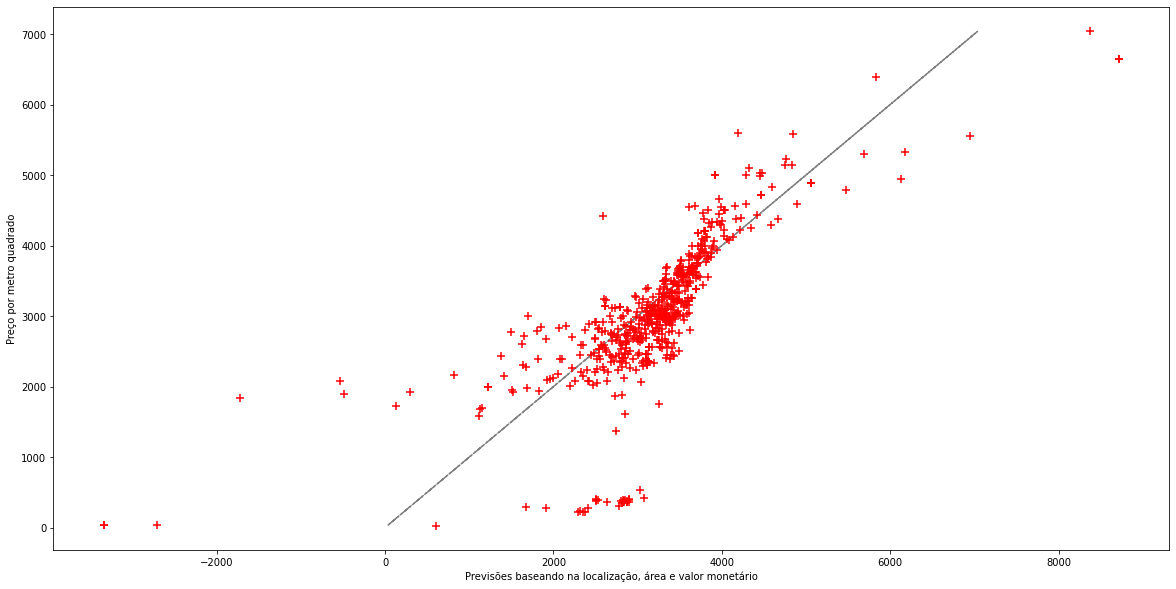

In [118]:
def grafico(y,predictions):
    plt.figure(figsize = (20,10))
    plt.plot(y, 
         y, 
         '-.', 
         c = 'grey'
        )
    
    plt.scatter(predictions, 
            y, 
            s = 50, 
            c = 'r', 
            marker = '+', 
            zorder = 10
           )   
    
    plt.xlabel("Previsões baseando na localização, área e valor monetário")
    plt.ylabel("Preço por metro quadrado")
    plt.show()
    
def info(model,X, y, predictions):
    print ('Intercepto = ', ' ', model.intercept_)
    print ('RM = ', ' ', model.coef_)
    print ('R2_train = ', ' ', model.score(X, y))
    
    print ("MSE:", metrics.mean_squared_error(y, predictions))
    print ("RMSE:",np.sqrt(metrics.mean_squared_error(y, predictions)) )
    print ('MAE:', metrics.mean_absolute_error(y, predictions))
    print ('R2:', metrics.r2_score(y, predictions))
    
    
def train_test(variaveis, targets):
    X = dfApartament[variaveis]
    y = targets   
    
    # usa shuffle = False para evitar data leakage
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)
    linreg = LinearRegression()
    model = linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    info(model,X_test, y_test, y_pred)
    grafico(y_test, y_pred)
    #sum_mod(model,X_test, y_test)
    

train_test(['lat', 'lon', 'surface_total_in_m2_Final','price_usd'], dfApartament["preco_metro"])

Intercepto =    2692575.3773853676
RM =    [4.45416616e+04 1.96657687e+04 6.97184975e-01]
R2_train =    -0.05551055245153069
MSE: 1103204.485906902
RMSE: 1050.3354159062246
MAE: 793.6079027309801
R2: -0.05551055245153069


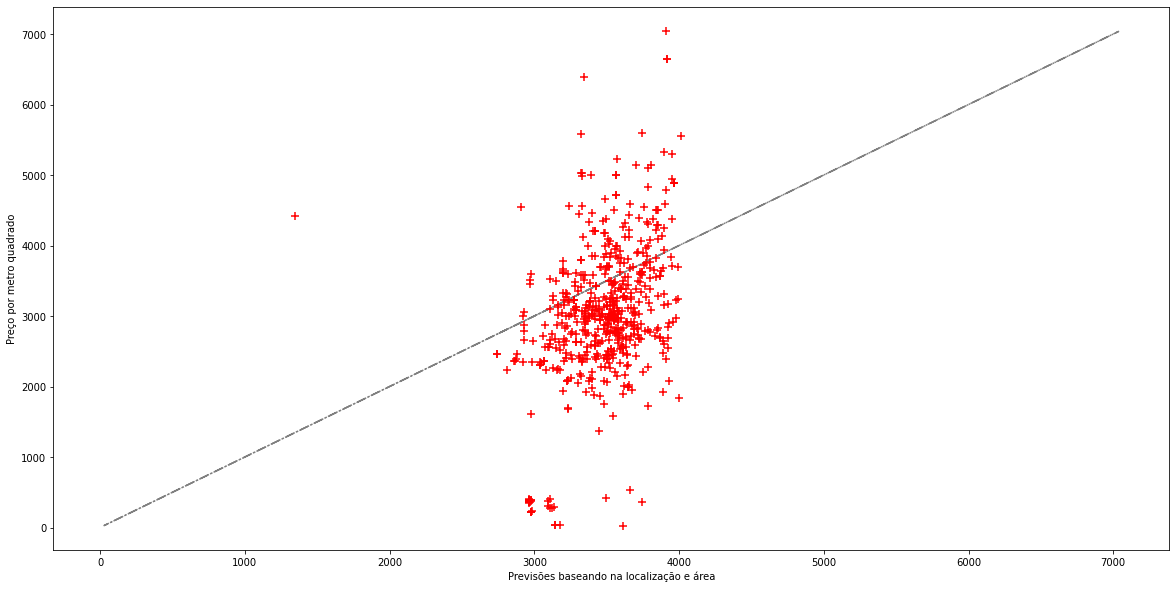

In [119]:
def grafico(y,predictions):
    plt.figure(figsize = (20,10))
    plt.plot(y, 
         y, 
         '-.', 
         c = 'grey'
        )
    
    plt.scatter(predictions, 
            y, 
            s = 50, 
            c = 'r', 
            marker = '+', 
            zorder = 10
           )   
    
    plt.xlabel("Previsões baseando na localização e área")
    plt.ylabel("Preço por metro quadrado")
    plt.show()
    
def info(model,X, y, predictions):
    print ('Intercepto = ', ' ', model.intercept_)
    print ('RM = ', ' ', model.coef_)
    print ('R2_train = ', ' ', model.score(X, y))
    
    print ("MSE:", metrics.mean_squared_error(y, predictions))
    print ("RMSE:",np.sqrt(metrics.mean_squared_error(y, predictions)) )
    print ('MAE:', metrics.mean_absolute_error(y, predictions))
    print ('R2:', metrics.r2_score(y, predictions))
    
    
def train_test(variaveis, targets):
    X = dfApartament[variaveis]
    y = targets   
    
    # usa shuffle = False para evitar data leakage
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)
    linreg = LinearRegression()
    model = linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    info(model,X_test, y_test, y_pred)
    grafico(y_test, y_pred)
    #sum_mod(model,X_test, y_test)
    

train_test(['lat', 'lon', 'surface_total_in_m2_Final'], dfApartament["preco_metro"])

Lembando que : Um valor negativo significa que estamos estimando pior do que usando a média.

Intercepto =    2850205.038828718
RM =    [46313.05835278 21314.18970682]
R2_train =    -0.05952727566432303
MSE: 1107402.707380583
RMSE: 1052.332032858728
MAE: 795.5434053998835
R2: -0.05952727566432303


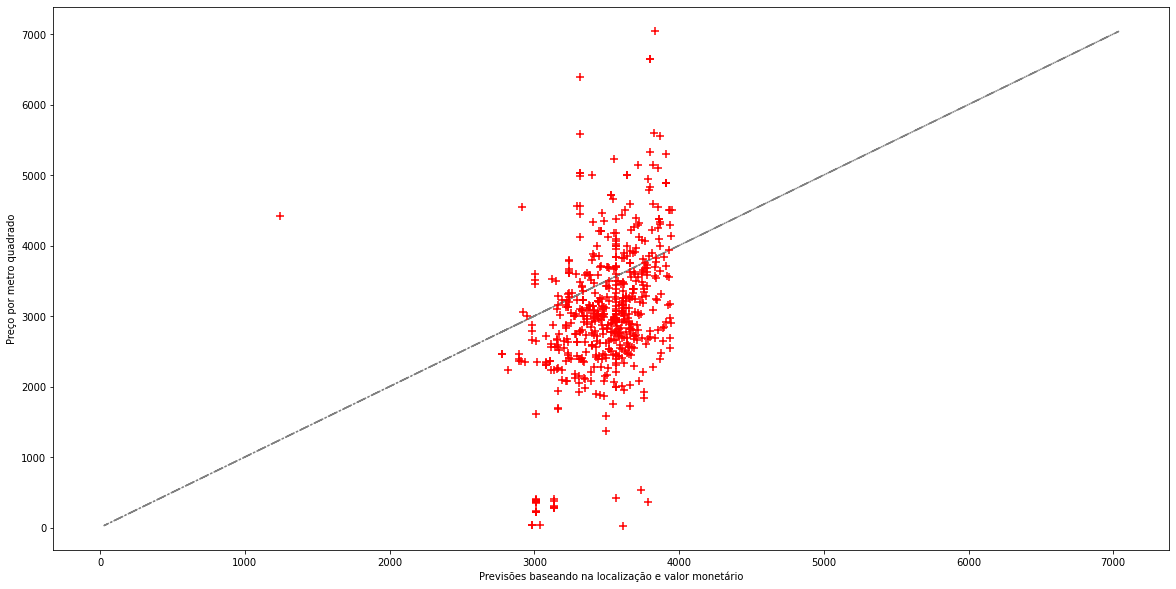

In [120]:
def grafico(y,predictions):
    plt.figure(figsize = (20,10))
    plt.plot(y, 
         y, 
         '-.', 
         c = 'grey'
        )
    
    plt.scatter(predictions, 
            y, 
            s = 50, 
            c = 'r', 
            marker = '+', 
            zorder = 10
           )   
    
    plt.xlabel("Previsões baseando na localização e valor monetário")
    plt.ylabel("Preço por metro quadrado")
    plt.show()
    
def info(model,X, y, predictions):
    print ('Intercepto = ', ' ', model.intercept_)
    print ('RM = ', ' ', model.coef_)
    print ('R2_train = ', ' ', model.score(X, y))
    
    print ("MSE:", metrics.mean_squared_error(y, predictions))
    print ("RMSE:",np.sqrt(metrics.mean_squared_error(y, predictions)) )
    print ('MAE:', metrics.mean_absolute_error(y, predictions))
    print ('R2:', metrics.r2_score(y, predictions))
    
    
def train_test(variaveis, targets):
    X = dfApartament[variaveis]
    y = targets   
    
    # usa shuffle = False para evitar data leakage
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)
    linreg = LinearRegression()
    model = linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    info(model,X_test, y_test, y_pred)
    grafico(y_test, y_pred)
    #sum_mod(model,X_test, y_test)
    

train_test(['lat', 'lon'], dfApartament["preco_metro"])

Intercepto =    238021135.76511103
RM =    [4.48511040e+06 1.42003756e+06 3.99429059e+03]
R2_train =    0.6537785649827941
MSE: 36377273235.50317
RMSE: 190728.27067716827
MAE: 111903.89896431315
R2: 0.6537785649827941


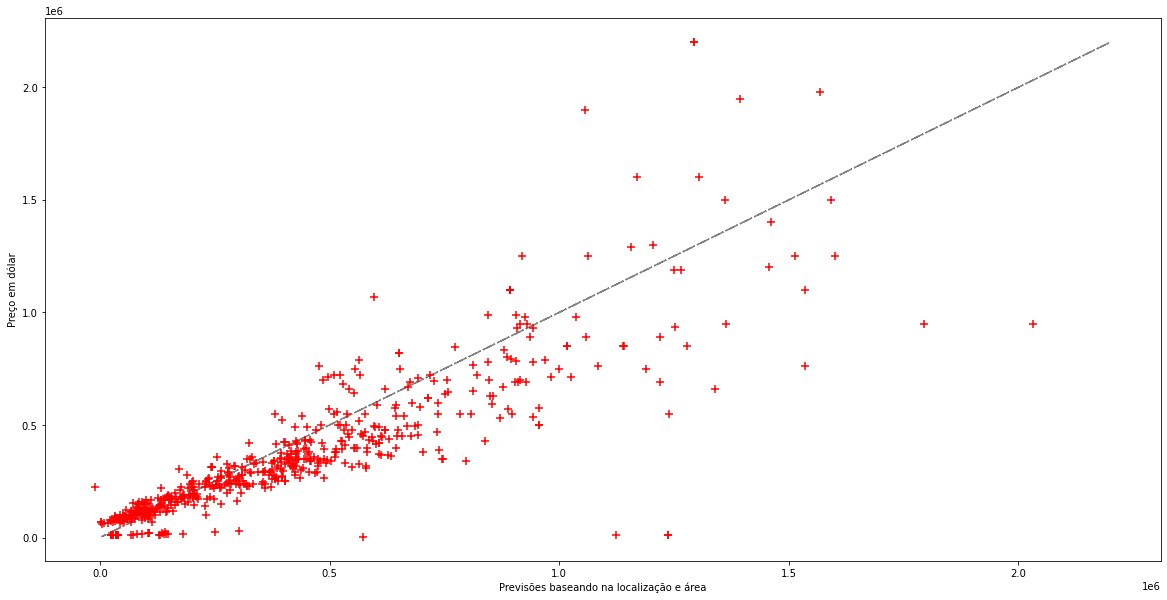

In [121]:
def grafico(y,predictions):
    plt.figure(figsize = (20,10))
    plt.plot(y, 
         y, 
         '-.', 
         c = 'grey'
        )
    
    plt.scatter(predictions, 
            y, 
            s = 50, 
            c = 'r', 
            marker = '+', 
            zorder = 10
           )   
    
    plt.xlabel("Previsões baseando na localização e área")
    plt.ylabel("Preço em dólar")
    plt.show()
    
def info(model,X, y, predictions):
    print ('Intercepto = ', ' ', model.intercept_)
    print ('RM = ', ' ', model.coef_)
    print ('R2_train = ', ' ', model.score(X, y))
    
    print ("MSE:", metrics.mean_squared_error(y, predictions))
    print ("RMSE:",np.sqrt(metrics.mean_squared_error(y, predictions)) )
    print ('MAE:', metrics.mean_absolute_error(y, predictions))
    print ('R2:', metrics.r2_score(y, predictions))
    
    
def train_test(variaveis, targets):
    X = dfApartament[variaveis]
    y = targets   
    
    # usa shuffle = False para evitar data leakage
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)
    linreg = LinearRegression()
    model = linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    info(model,X_test, y_test, y_pred)
    grafico(y_test, y_pred)
    #sum_mod(model,X_test, y_test)
    

train_test(['lat', 'lon', 'surface_total_in_m2_Final'], dfApartament["price_usd"])

Intercepto =    88386334.77983023
RM =    [2.00979152e+06 3.27149539e+05 3.95554585e+03 5.55731150e+01]
R2_train =    0.7767243282299808
MSE: 23459437508.295425
RMSE: 153164.73976831426
MAE: 83431.72279794884
R2: 0.7767243282299808


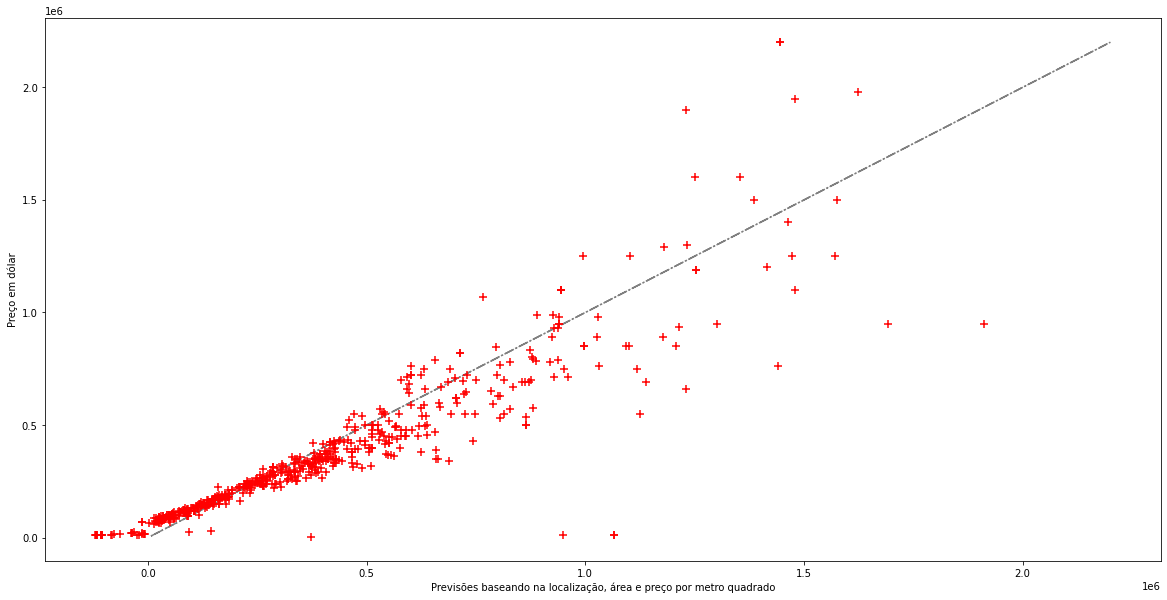

In [122]:
def grafico(y,predictions):
    plt.figure(figsize = (20,10))
    
    plt.plot(y, 
         y, 
         '-.', 
         c = 'grey'
        )
    
    plt.scatter(predictions, 
            y, 
            s = 50, 
            c = 'r', 
            marker = '+', 
            zorder = 10
           )   
    
    plt.xlabel("Previsões baseando na localização, área e preço por metro quadrado")
    plt.ylabel("Preço em dólar")
    plt.show()
    
def info(model,X, y, predictions):
    print ('Intercepto = ', ' ', model.intercept_)
    print ('RM = ', ' ', model.coef_)
    print ('R2_train = ', ' ', model.score(X, y))
    
    print ("MSE:", metrics.mean_squared_error(y, predictions))
    print ("RMSE:",np.sqrt(metrics.mean_squared_error(y, predictions)) )
    print ('MAE:', metrics.mean_absolute_error(y, predictions))
    print ('R2:', metrics.r2_score(y, predictions))
    
    
def train_test(variaveis, targets):
    X = dfApartament[variaveis]
    y = targets   
    
    # usa shuffle = False para evitar data leakage
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)
    linreg = LinearRegression()
    model = linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    info(model,X_test, y_test, y_pred)
    grafico(y_test, y_pred)
    #sum_mod(model,X_test, y_test)
    

train_test(['lat', 'lon', 'surface_total_in_m2_Final','preco_metro'], dfApartament["price_usd"])

<h4>8.3. Regressão com statsmodels</h4>

In [140]:
# Importamos a api.
import statsmodels.api as sm

# De manera análoga ao primeiro exercício, definimos o vetor de variáveis com a primeira 
#variável `RM`.

X = dfApartament[['lat', 'lon', 'price_usd']]
y = dfApartament[["preco_metro"]]

# Teremos que agregar explícitamente uma constante:
X = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<h5>8.3.1 Regressão OLS</h5>

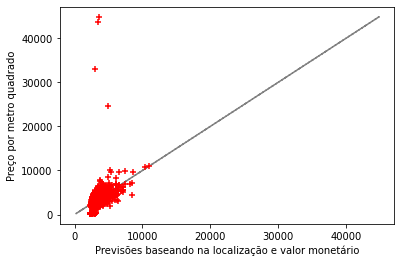

MSE: 2918638.234666427
                            OLS Regression Results                            
Dep. Variable:            preco_metro   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     139.4
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           7.03e-83
Time:                        23:41:25   Log-Likelihood:                -20117.
No. Observations:                2270   AIC:                         4.024e+04
Df Residuals:                    2266   BIC:                         4.027e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.787e+05    3.1e

In [141]:
res = sm.OLS(y, X).fit()
predictions_ols = res.predict(X)

# Plotamos os resultados
plt.plot(y, 
         y, 
         '-.', 
         c = 'grey'
        )

plt.scatter(predictions_ols, 
            y, 
            s = 30, 
            c = 'r', 
            marker = '+', 
            zorder = 10
           )
plt.xlabel("Previsões baseando na localização e valor monetário")
plt.ylabel("Preço por metro quadrado")
plt.show()

# Imprimimos o MSE e um resumo do modelo
print ("MSE:",  metrics.mean_squared_error(y, predictions_ols))
print (res.summary())

<h5>8.3.1 Regressão RLM</h5>

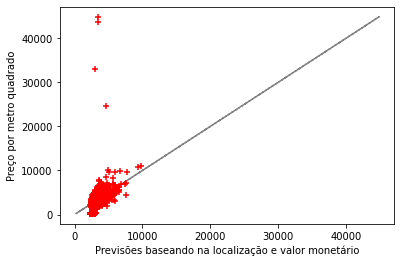

MSE: 2933252.2478217026
                    Robust linear Model Regression Results                    
Dep. Variable:            preco_metro   No. Observations:                 2270
Model:                            RLM   Df Residuals:                     2266
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 30 Jun 2022                                         
Time:                        23:41:37                                         
No. Iterations:                    17                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.978e+05   1.53

In [142]:
resrlm = sm.RLM(y, X).fit()
predictions_rlm = resrlm.predict(X)

# Plotamos os resultados
plt.plot(y, 
         y, 
         '-.', 
         c = 'grey'
        )

plt.scatter(predictions_rlm, 
            y, 
            s = 30, 
            c = 'r', 
            marker = '+', 
            zorder = 10
           )
plt.xlabel("Previsões baseando na localização e valor monetário")
plt.ylabel("Preço por metro quadrado")
plt.show()

# Imprimimos o MSE e um resumo do modelo
print ("MSE:",  metrics.mean_squared_error(y, predictions_rlm))
print (resrlm.summary())

<h3>9. Permutation Importance</h3>
<p>O método Permutation Importance será utilizado no modelo de Regressão Múltipla para avaliar o impacto das features sobre o modelo.<p>

In [126]:
from sklearn.inspection import permutation_importance


def generate_train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)
    return X_train, X_test, y_train, y_test


def generate_model(X, y):
    X_train, X_test, y_train, y_test = generate_train_test(X, y)

    linreg = LinearRegression()
    model = linreg.fit(X_train, y_train)
    return model


def generate_feature_importance(model, X, y):
    return permutation_importance(model, X, y, n_repeats=10, random_state=0)


def grafico(y, predictions, column_names):
    names = ', '.join(column_names.values)

    plt.plot(y, 
         y, 
         '-.', 
         c = 'grey'
        )
    
    plt.scatter(predictions, 
            y, 
            s = 50, 
            c = 'r', 
            marker = '+', 
            zorder = 10
           )   
    
    plt.title(f"Previsões baseando em {names}")
    plt.xlabel(f"Previsões")
    plt.ylabel("Preço por metro quatrado")
    plt.show()


Inicialmente, verificamos os resultados do Permutation Importance incluindo todas as variáveis numéricas, com excessão de "price", já que ela apresenta valores em diferentes moedas.  
O score obtido tem valor menor que 50%, portanto, o modelo deve ser ajustado.

In [127]:
# remover 'price'
X = dfApartament[['lat', 'lon', 'surface_total_in_m2_media', 'surface_total_in_m2_Final', 'price_usd']]

y = dfApartament["preco_metro"]

X_train, X_test, y_train, y_test = generate_train_test(X, y)

model = generate_model(X, y)
model.score(X_test, y_test)

0.4119542296728502

Intercepto =    1182075.882260948
RM =    [ 2.11683407e+04  7.65240383e+03  6.29720769e+00 -2.05617070e+01
  5.31498212e-03]
R2_train =    0.4119542296728502
MSE: 614617.0023944705
RMSE: 783.9751286836021
MAE: 502.57471465876836
R2: 0.4119542296728502


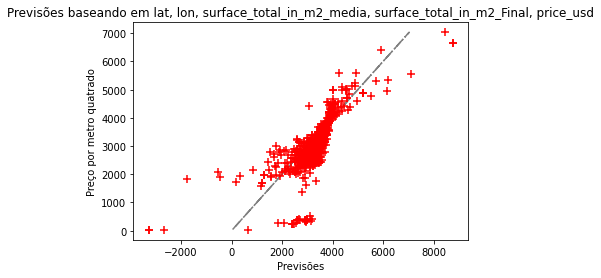

In [128]:
y_pred = model.predict(X_test)

info(model, X_test, y_test, y_pred)
grafico(y_test, y_pred, X_test.columns)

A variável "surface_total_in_m2_media" é a que tem menos influência sobre o modelo, então ela será removida para observar os novos resultados.

In [129]:
feature_importance = generate_feature_importance(model, X_test, y_test)

column_names = X.columns
result = pd.Series(feature_importance.importances_mean, index=column_names)
result.sort_values(ascending=False)

price_usd                    6.377857
surface_total_in_m2_Final    4.729100
lon                          0.027550
lat                          0.027391
surface_total_in_m2_media    0.000000
dtype: float64

In [130]:
# remover 'surface_total_in_m2_media'
X = dfApartament[['lat', 'lon', 'surface_total_in_m2_Final', 'price_usd']]

X_train, X_test, y_train, y_test = generate_train_test(X, y)

model = generate_model(X, y)
model.score(X_test, y_test)

0.4571634037063539

Intercepto =    1433065.1176442145
RM =    [ 2.08082963e+04  1.21515121e+04 -2.04389631e+01  5.29158999e-03]
R2_train =    0.4571634037063539
MSE: 567365.022315193
RMSE: 753.2363655023521
MAE: 470.9137019435228
R2: 0.4571634037063539


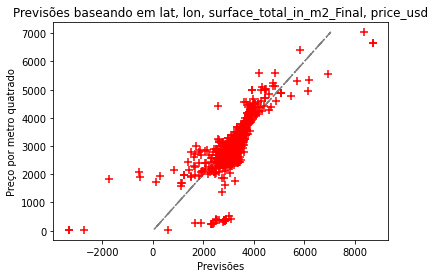

In [131]:
y_pred = model.predict(X_test)

info(model, X_test, y_test, y_pred)
grafico(y_test, y_pred, X_test.columns)

In [132]:
feature_importance = generate_feature_importance(model, X_test, y_test)

column_names = X.columns
result = pd.Series(feature_importance.importances_mean, index=column_names)
result.sort_values(ascending=False)

price_usd                    6.278011
surface_total_in_m2_Final    4.725013
lon                          0.043473
lat                          0.027833
dtype: float64

In [133]:
# remover 'lat' e 'lon'
X = dfApartament[['surface_total_in_m2_Final', 'price_usd']]

X_train, X_test, y_train, y_test = generate_train_test(X, y)

model = generate_model(X, y)
model.score(X_test, y_test)

0.46453882736491603

Intercepto =    3478.112117345552
RM =    [-2.00134840e+01  5.40602145e-03]
R2_train =    0.46453882736491603
MSE: 559656.3353232044
RMSE: 748.1018214943768
MAE: 463.69867152137965
R2: 0.46453882736491603


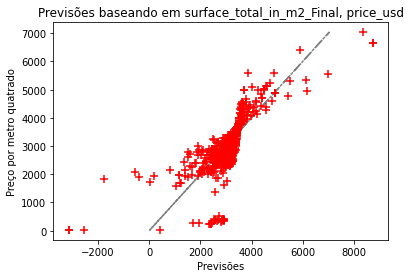

In [134]:
y_pred = model.predict(X_test)

info(model, X_test, y_test, y_pred)
grafico(y_test, y_pred, X_test.columns)

In [135]:
feature_importance = generate_feature_importance(model, X_test, y_test)

column_names = X.columns
result = pd.Series(feature_importance.importances_mean, index=column_names)
result.sort_values(ascending=False)

price_usd                    6.496794
surface_total_in_m2_Final    4.582739
dtype: float64

Normalizar os dados antes de treinar no modelo, utilizando Standard Scaler

In [136]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

# X = dfApartament[['lat', 'lon', 'surface_total_in_m2_media', 'surface_total_in_m2_Final', 'price_usd']]
X = dfApartament[['surface_total_in_m2_Final', 'price_usd']]

scaler = StandardScaler()
# scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data_scaled, columns=X.columns)

y = dfApartament["preco_metro"]

X_train, X_test, y_train, y_test = generate_train_test(X_scaled, y)

model = generate_model(X_scaled, y)
model.score(X_test, y_test)

0.46453882736491625

Intercepto =    3299.5824000194593
RM =    [-1628.04176816  2014.56803227]
R2_train =    0.46453882736491625
MSE: 559656.3353232043
RMSE: 748.1018214943767
MAE: 463.6986715213796
R2: 0.46453882736491625


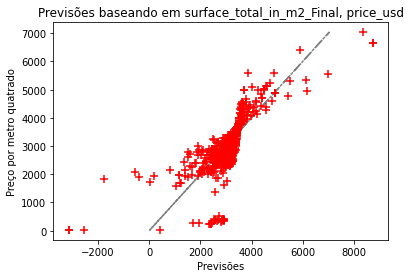

In [137]:
y_pred = model.predict(X_test)

info(model, X_test, y_test, y_pred)
grafico(y_test, y_pred, X_test.columns)

In [138]:
feature_importance = generate_feature_importance(model, X_test, y_test)

column_names = X.columns
result = pd.Series(feature_importance.importances_mean, index=column_names)
result.sort_values(ascending=False)

price_usd                    6.496794
surface_total_in_m2_Final    4.582739
dtype: float64

Teste com o Modelo Decision Tree Regressor

R2_train: 0.9115653055118074
MSE: 92430.67389765437
RMSE: 304.024133742133
MAE: 129.29836901480232
R2: 0.9115653055118074


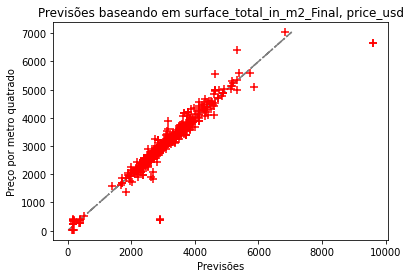

In [139]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

print ('R2_train:', tree_model.score(X_test, y_test))
print ("MSE:", metrics.mean_squared_error(y_test, y_pred))
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)) )
print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('R2:', metrics.r2_score(y_test, y_pred))


grafico(y_test, y_pred, X_test.columns)